<a href="https://colab.research.google.com/github/Thisakaran/Fake-News-Prediction-with-Python/blob/main/Final_research_Sentiment_Analysis%F0%9F%A5%B0%F0%9F%98%B6%F0%9F%98%92_Work_from_Home_tweets_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Effectiveness of Work from Home after the Covid pandemic**

**Student Name:Thisakaran Rasalingam**

**Student No :CT/2017/066**

**Supervisor Name:Mudita rangani Tissera**

*Thisakaran Rasalingam | Department of software engineering | FCT | University of Kelaniya*

**Define the problem**

***Topic:-*** "Effectiveness of work from home after the Covid-19 pandemic by using NLP/ML techniques "

*My steps for achieve this sentiment anlaysis:*

1.Get data from twitter API.

2.After getting data then some EAD analysis.

3.Preprossing techniques.

4.Use NLP sentiment polarity method and create labeling.

5.Split the Data into three parts such as Traning, developing and testing.

6.Feature Extraction and feature engineering.

7.Develop a Sentiment Analysis Model.

8.Algorithm Selection.

9.Fine-tune and Validate the Model.

10.four-fold pattern method.

11.Fine-tune and Validate the Model.

12.Evaluate Model Performance.

13.Analyze and Interpret the Results.

14.Visualization.

15.Modal deployment.

# **Get data from Twitter ✈ :**

**IMPORT NECESSARY LIBRARIES**

In [ ]:
import tweepy
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models import LdaModel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
import csv
# Download nltk resources
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
#Get the real tweets
import tweepy
# Enter your Twitter API credentials
consumer_key = "nyRAYIhYId0TD7VP3dSvMppwp"
consumer_secret = "LP7G4ssjeTXFyEFLdhjCtXcbb6DVbT4f3qtk0qhsOzHAeFZLds"
access_token = "902730858746060805-xD2vMKeh7TRScmAdo5JKAkeTTs3Se0v"
access_token_secret = "gOCTuFXH01nRkDjlasvIiyyibUDq4KkyU9tMSrT99MhrT"

# Authenticate with Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Create the API object
api = tweepy.API(auth, wait_on_rate_limit=True)

# Set the hashtags, date range, and number of tweets to collect
hashtags = ["WFH", "WorkFromHome", "RemoteWork","Covid-19"]
num_tweets = 15000
# start_date = "2022-01-07"
end_date = "2023-07-09"

tweet_list = []
for hashtag in hashtags:
    tweets = api.search_tweets(q=f"#{hashtag}", lang='en', count=num_tweets,tweet_mode='extended',until=end_date)
    for tweet in tweets:
        tweet_data = {
            'tweet_id': tweet.id,
            'tweet_text': tweet.full_text,
            'location': tweet.user.location,''
            'created_date': tweet.created_at
        }
        tweet_list.append(tweet_data)

df = pd.DataFrame(tweet_list)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Real tweets About WFH by Thisakaran  R.csv to Real tweets About WFH by Thisakaran  R.csv


In [ ]:
# Load the CSV data
Work_from_data = pd.read_csv('/content/Real tweets About WFH by Thisakaran  R.csv')

# **EDA analysis ✈ :**

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process, including sentiment analysis. EDA helps you understand the characteristics, patterns, and relationships present in your dataset.

In [ ]:
Work_from_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5470 entries, 0 to 5469
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      5470 non-null   float64
 1   tweet_text    5470 non-null   object 
 2   location      3624 non-null   object 
 3   created_date  5470 non-null   object 
dtypes: float64(1), object(3)
memory usage: 171.1+ KB


In [ ]:
display(Work_from_data)

,tweet_id,tweet_text,location,created_date
0,1.660000e+18,New Remote Job! Proxify AB: Senior React Nativ...,NaN,5/31/2023 5:01
1,1.660000e+18,RT @b2bgifts: Crisp chrome metal signatures ad...,NaN,5/31/2023 5:00
2,1.660000e+18,RT @AzioCorp: Our Tera 75 @Kickstarter Campaig...,United States,5/31/2023 4:45
3,1.660000e+18,New Remote Job! SportyBet: Frontend Developer ...,NaN,5/31/2023 4:39
4,1.660000e+18,Today: https://t.co/v4QvUx2eWv How #WFH is imp...,"Des Moines, Iowa",5/31/2023 4:20
...,...,...,...,...
5465,1.668870e+18,RT @K24Tv: Since he was diagnosed with COVID-1...,"Nairobi, Kenya",6/14/2023 12:16
5466,1.668870e+18,RT @griptmedia: Mark Zuckerberg has admitted i...,NaN,6/14/2023 12:16
5467,1.668870e+18,RT @realtech_23: Hp Elitebook 820 G4 is a mast...,NaN,6/14/2023 12:16
5468,1.668870e+18,The Department of Education has locked in for ...,"Washington, DC",6/14/2023 12:16


In [ ]:
# Check the dimensions of the DataFrame
print(f"Number of rows: {Work_from_data.shape[0]}")
print(f"Number of columns: {Work_from_data.shape[1]}")

Number of rows: 5470
Number of columns: 4


In [ ]:
# Check the data types of each column
print(Work_from_data.dtypes)

# Summary statistics of the dataset
print(Work_from_data.describe())

tweet_id        float64
tweet_text       object
location         object
created_date     object
dtype: object
           tweet_id
count  5.470000e+03
mean   1.666611e+18
std    1.870872e+15
min    1.660000e+18
25%    1.665510e+18
50%    1.666920e+18
75%    1.667920e+18
max    1.668870e+18


In [ ]:
# Explore the location column
location_counts = Work_from_data['location'].value_counts()
print(location_counts.head(10))

Remote            192
Worldwide         177
USA               174
United States      85
Surrey UK          50
Global             47
St. Louis, Mo.     35
Australia          35
Vancouver BC       34
Online             34
Name: location, dtype: int64


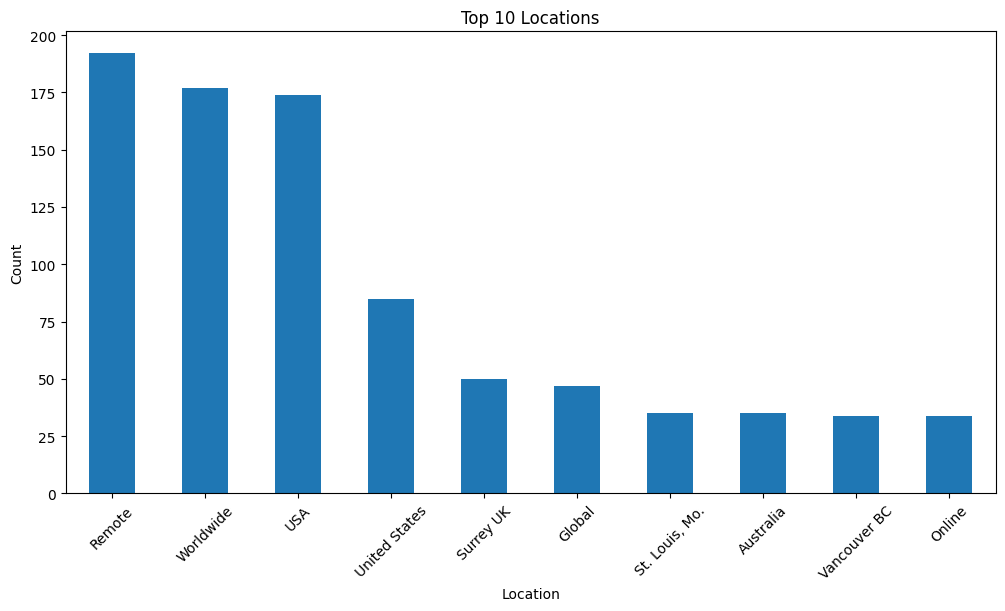

In [ ]:
# Visualize the top 10 locations
plt.figure(figsize=(12, 6))
location_counts.head(10).plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Locations')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Explore the time distribution of tweets
Work_from_data['created_date'] = pd.to_datetime(Work_from_data['created_date'])
Work_from_data['date'] = Work_from_data['created_date'].dt.date
date_counts = Work_from_data['date'].value_counts().sort_index()

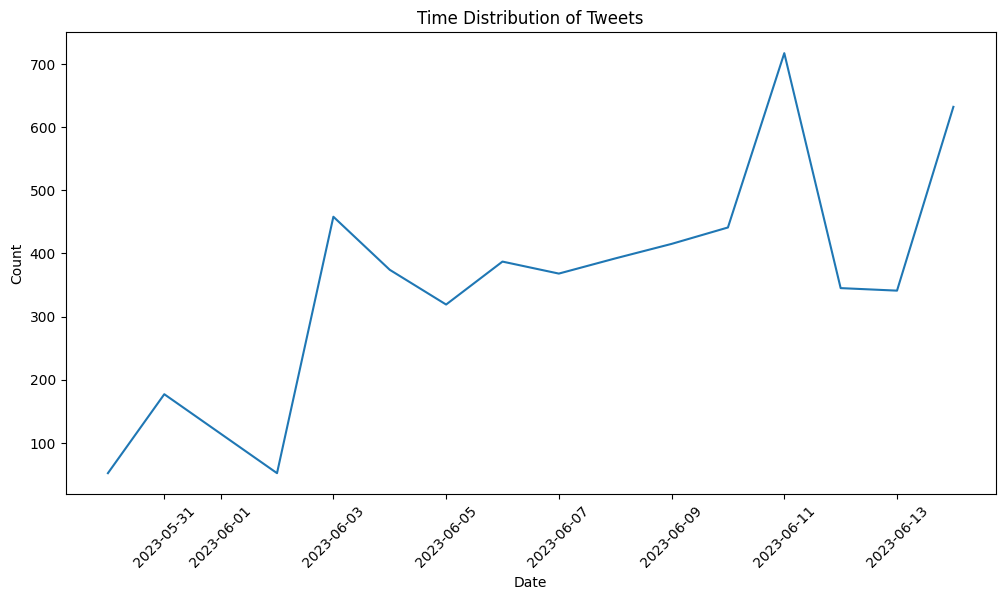

In [ ]:
# Visualize the time distribution of tweets
plt.figure(figsize=(12, 6))
date_counts.plot()
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Time Distribution of Tweets')
plt.xticks(rotation=45)
plt.show()

# **Preprocess the Data ✈ :**

Clean and preprocess the dataset by removing noise, such as URLs or special characters. Perform tokenization, lowercasing, and remove stopwords to prepare the text for analysis.

In [ ]:
Work_from_data.head()

,tweet_id,tweet_text,location,created_date
0,1.660000e+18,New Remote Job! Proxify AB: Senior React Nativ...,NaN,5/31/2023 5:01
1,1.660000e+18,RT @b2bgifts: Crisp chrome metal signatures ad...,NaN,5/31/2023 5:00
2,1.660000e+18,RT @AzioCorp: Our Tera 75 @Kickstarter Campaig...,United States,5/31/2023 4:45
3,1.660000e+18,New Remote Job! SportyBet: Frontend Developer ...,NaN,5/31/2023 4:39
4,1.660000e+18,Today: https://t.co/v4QvUx2eWv How #WFH is imp...,"Des Moines, Iowa",5/31/2023 4:20


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


# Clean the text data
def clean_text(text):
    # Remove special characters, URLs, and mentions
    text = re.sub(r'http\S+|www\S+|@[^\s]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Convert text to lowercase
def lowercase_text(text):
    return text.lower()

# Remove links
def remove_links(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    return text

# Remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

# Perform stemming
def perform_stemming(text):
    stemmer = PorterStemmer()
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply data preprocessing steps
Work_from_data['clean_text'] = Work_from_data['tweet_text'].apply(clean_text)
Work_from_data['clean_text'] = Work_from_data['clean_text'].apply(lowercase_text)
Work_from_data['clean_text'] = Work_from_data['clean_text'].apply(remove_links)
Work_from_data['clean_text'] = Work_from_data['clean_text'].apply(remove_stopwords)
Work_from_data['clean_text'] = Work_from_data['clean_text'].apply(perform_stemming)

# Display the preprocessed data
Work_from_data['clean_text'] = Work_from_data['tweet_text'].apply(clean_text)

In [ ]:
print(Work_from_data[['tweet_text', 'clean_text']].head())

                                          tweet_text  \
0  New Remote Job! Proxify AB: Senior React Nativ...   
1  RT @b2bgifts: Crisp chrome metal signatures ad...   
2  RT @AzioCorp: Our Tera 75 @Kickstarter Campaig...   
3  New Remote Job! SportyBet: Frontend Developer ...   
4  Today: https://t.co/v4QvUx2eWv How #WFH is imp...   

                                          clean_text  
0  New Remote Job Proxify AB Senior React Native ...  
1  RT  Crisp chrome metal signatures add the perf...  
2  RT  Our Tera 75  Campaign Is Now Live Check ou...  
3  New Remote Job SportyBet Frontend Developer \n...  
4  Today  How WFH is impacting the suburbs and th...  


In [ ]:
Work_from_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5470 entries, 0 to 5469
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      5470 non-null   float64
 1   tweet_text    5470 non-null   object 
 2   location      3624 non-null   object 
 3   created_date  5470 non-null   object 
 4   clean_text    5470 non-null   object 
dtypes: float64(1), object(4)
memory usage: 213.8+ KB


In [ ]:

# Assuming your DataFrame is named df
columns_to_check = ['tweet_id', 'tweet_text', 'location', 'created_date', 'clean_text']

# Check for null values
null_count = Work_from_data[columns_to_check].isnull().sum()
print("Null Values:")
print(null_count)


# Check for NaN values
nan_count = Work_from_data[columns_to_check].isna().sum()
print("\n\nNaN Values:")
print(nan_count)

# Check if the DataFrame is empty
is_empty = Work_from_data.empty
print("Is DataFrame Empty?", is_empty)


Null Values:
tweet_id           0
tweet_text         0
location        1846
created_date       0
clean_text         0
dtype: int64


NaN Values:
tweet_id           0
tweet_text         0
location        1846
created_date       0
clean_text         0
dtype: int64
Is DataFrame Empty? False


In [ ]:
Work_from_data.head()

,tweet_id,tweet_text,location,created_date,clean_text
0,1.660000e+18,New Remote Job! Proxify AB: Senior React Nativ...,NaN,5/31/2023 5:01,New Remote Job Proxify AB Senior React Native ...
1,1.660000e+18,RT @b2bgifts: Crisp chrome metal signatures ad...,NaN,5/31/2023 5:00,RT Crisp chrome metal signatures add the perf...
2,1.660000e+18,RT @AzioCorp: Our Tera 75 @Kickstarter Campaig...,United States,5/31/2023 4:45,RT Our Tera 75 Campaign Is Now Live Check ou...
3,1.660000e+18,New Remote Job! SportyBet: Frontend Developer ...,NaN,5/31/2023 4:39,New Remote Job SportyBet Frontend Developer \n...
4,1.660000e+18,Today: https://t.co/v4QvUx2eWv How #WFH is imp...,"Des Moines, Iowa",5/31/2023 4:20,Today How WFH is impacting the suburbs and th...


In [ ]:
from google.colab import files

# Assuming you have preprocessed your data and stored it in a DataFrame called 'preprocessed_data'

# Save the preprocessed DataFrame as a CSV file
Work_from_data.to_csv('After_Preprossed_WFH_data.csv', index=False)

# Download the file to your local machine
files.download('After_Preprossed_WFH_data.csv')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving After_Preprossed_WFH_data.csv to After_Preprossed_WFH_data.csv


In [ ]:
# Load the CSV data
Work_from_data = pd.read_csv('/content/After_Preprossed_WFH_data.csv')

In [ ]:
Work_from_data.head()

,tweet_id,tweet_text,location,created_date,clean_text
0,1.660000e+18,New Remote Job! Proxify AB: Senior React Nativ...,NaN,5/31/2023 5:01,New Remote Job Proxify AB Senior React Native ...
1,1.660000e+18,RT @b2bgifts: Crisp chrome metal signatures ad...,NaN,5/31/2023 5:00,RT Crisp chrome metal signatures add the perf...
2,1.660000e+18,RT @AzioCorp: Our Tera 75 @Kickstarter Campaig...,United States,5/31/2023 4:45,RT Our Tera 75 Campaign Is Now Live Check ou...
3,1.660000e+18,New Remote Job! SportyBet: Frontend Developer ...,NaN,5/31/2023 4:39,New Remote Job SportyBet Frontend Developer \n...
4,1.660000e+18,Today: https://t.co/v4QvUx2eWv How #WFH is imp...,"Des Moines, Iowa",5/31/2023 4:20,Today How WFH is impacting the suburbs and th...


# **Use NLP techniques in Polarity ✈ :**

**Set NLP Polarity technique**

In [ ]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer


# Clean the 'clean_text' column by replacing NaN values with an empty string
Work_from_data['clean_text'] = Work_from_data['clean_text'].fillna('')

# Convert the 'clean_text' column to string type
Work_from_data['clean_text'] = Work_from_data['clean_text'].astype(str)

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Assign sentiment labels
def assign_sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Calculate sentiment scores and labels
Work_from_data['sentiment_scores'] = Work_from_data['clean_text'].apply(lambda x: sia.polarity_scores(x))
Work_from_data['compound_score'] = Work_from_data['sentiment_scores'].apply(lambda x: x['compound'])
Work_from_data['sentiment_label'] = Work_from_data['compound_score'].apply(assign_sentiment_label)

# Create separate columns for positive, negative, and neutral labels
Work_from_data['positive_sentiment'] = Work_from_data['compound_score'].apply(lambda x: x if x > 0 else 0)
Work_from_data['negative_sentiment'] = Work_from_data['compound_score'].apply(lambda x: -x if x < 0 else 0)
Work_from_data['neutral_sentiment'] = Work_from_data['compound_score'].apply(lambda x: 1 - abs(x) if abs(x) < 1 else 0)

# Display the labeled data
print(Work_from_data[['clean_text','positive_sentiment', 'negative_sentiment', 'neutral_sentiment', 'sentiment_label']].head())





                                          clean_text  positive_sentiment  \
0  New Remote Job Proxify AB Senior React Native ...              0.0000   
1  RT  Crisp chrome metal signatures add the perf...              0.5719   
2  RT  Our Tera 75  Campaign Is Now Live Check ou...              0.4019   
3  New Remote Job SportyBet Frontend Developer \n...              0.0000   
4  Today  How WFH is impacting the suburbs and th...              0.0000   

   negative_sentiment  neutral_sentiment sentiment_label  
0                 0.0             1.0000         Neutral  
1                 0.0             0.4281        Positive  
2                 0.0             0.5981        Positive  
3                 0.0             1.0000         Neutral  
4                 0.0             1.0000         Neutral  


In [ ]:
display(Work_from_data)

,tweet_id,tweet_text,location,created_date,clean_text,sentiment_scores,compound_score,sentiment_label,positive_sentiment,negative_sentiment,neutral_sentiment
0,1.660000e+18,New Remote Job! Proxify AB: Senior React Nativ...,NaN,5/31/2023 5:01,New Remote Job Proxify AB Senior React Native ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,0.0000,0.0000,1.0000
1,1.660000e+18,RT @b2bgifts: Crisp chrome metal signatures ad...,NaN,5/31/2023 5:00,RT Crisp chrome metal signatures add the perf...,"{'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...",0.5719,Positive,0.5719,0.0000,0.4281
2,1.660000e+18,RT @AzioCorp: Our Tera 75 @Kickstarter Campaig...,United States,5/31/2023 4:45,RT Our Tera 75 Campaign Is Now Live Check ou...,"{'neg': 0.0, 'neu': 0.881, 'pos': 0.119, 'comp...",0.4019,Positive,0.4019,0.0000,0.5981
3,1.660000e+18,New Remote Job! SportyBet: Frontend Developer ...,NaN,5/31/2023 4:39,New Remote Job SportyBet Frontend Developer \n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,0.0000,0.0000,1.0000
4,1.660000e+18,Today: https://t.co/v4QvUx2eWv How #WFH is imp...,"Des Moines, Iowa",5/31/2023 4:20,Today How WFH is impacting the suburbs and th...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,0.0000,0.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...
5465,1.668870e+18,RT @K24Tv: Since he was diagnosed with COVID-1...,"Nairobi, Kenya",6/14/2023 12:16,RT Since he was diagnosed with COVID19 last w...,"{'neg': 0.0, 'neu': 0.873, 'pos': 0.127, 'comp...",0.4939,Positive,0.4939,0.0000,0.5061
5466,1.668870e+18,RT @griptmedia: Mark Zuckerberg has admitted i...,NaN,6/14/2023 12:16,RT Mark Zuckerberg has admitted in a bombshel...,"{'neg': 0.084, 'neu': 0.842, 'pos': 0.074, 'co...",-0.0516,Negative,0.0000,0.0516,0.9484
5467,1.668870e+18,RT @realtech_23: Hp Elitebook 820 G4 is a mast...,NaN,6/14/2023 12:16,RT Hp Elitebook 820 G4 is a masterpiece7th Ge...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,0.0000,0.0000,1.0000
5468,1.668870e+18,The Department of Education has locked in for ...,"Washington, DC",6/14/2023 12:16,The Department of Education has locked in for ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,0.0000,0.0000,1.0000


In [ ]:

# Count the number of positive, negative, and neutral tweets
positive_count = Work_from_data['sentiment_label'].value_counts()['Positive']
negative_count = Work_from_data['sentiment_label'].value_counts()['Negative']
neutral_count = Work_from_data['sentiment_label'].value_counts()['Neutral']

# Calculate the overall sentiment analysis output
Overall_sentiment_output = 'Positive' if positive_count > negative_count else 'Negative' if negative_count > positive_count else 'Neutral'

# Display the results
print("Number of positive tweets:", positive_count)
print("Number of negative tweets:", negative_count)
print("Number of neutral tweets:", neutral_count)


Number of positive tweets: 2825
Number of negative tweets: 1092
Number of neutral tweets: 1553


In [ ]:
print("Overall sentiment analysis:", Overall_sentiment_output)

Overall sentiment analysis: Positive


# **Split the Data ✈ :**

Training set: This set is used to train your sentiment analysis model. It contains labeled data with known sentiments (e.g., positive, negative, neutral). The model learns patterns and relationships from this data to make predictions.

Validation set: This set is used to tune and optimize the hyperparameters of your sentiment analysis model. It helps you assess the model's performance on unseen data and make adjustments to improve its accuracy. You can use the validation set to fine-tune parameters, select the best model, or perform early stopping during the training process.

Test set: This set is used to evaluate the final performance of your sentiment analysis model. It consists of unseen data that the model has not been exposed to during training or validation. The test set allows you to measure how well your model generalizes to new and unseen data. It provides an unbiased estimate of the model's performance and helps assess its real-world applicability.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment' column indicating the sentiment of each tweet

# Split the data into features and target
X = Work_from_data[features]
y = Work_from_data[target]

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Verify the shapes of the splits
print("Training data shape:", X_train.shape)
print("Validation data shape:", X_valid.shape)
print("Test data shape:", X_test.shape)


Training data shape: (3282, 1)
Validation data shape: (1094, 1)
Test data shape: (1094, 1)


In [ ]:
print("Training set:")
print(X_train.head())  # Print the first few rows of the training features
print(y_train.head())  # Print the corresponding sentiment labels

print("\nValidation set:")
print(X_valid.head())  # Print the first few rows of the validation features
print(y_valid.head())  # Print the corresponding sentiment labels

print("\nTest set:")
print(X_test.head())   # Print the first few rows of the test features
print(y_test.head())   # Print the corresponding sentiment labels


Training set:
                                             clean_text
2347  OneClickAccess  To Our 11 Automated Apps\nThat...
761   How to get ClickFunnels For Free\nHow to build...
3039  RT  INCOMING HOT TAKE\n\nTldr Sleep Researcher...
2481  RT  Repeated COVID19 vaccination weakens the i...
3580  Why do you need a guide to globalhiring \n\nTh...
     sentiment_label
2347        Positive
761         Positive
3039        Positive
2481        Negative
3580        Positive

Validation set:
                                             clean_text
551   RT  The family of a college student who died f...
5062  RT  US data show rise in hospitalizations for ...
4733  RT  World Health Organization at start of pand...
4905  Suddenly Working From Home  Ive done it since ...
5120  RT  COVID19 infections increase risk of longte...
     sentiment_label
551         Negative
5062        Positive
4733         Neutral
4905        Positive
5120        Negative

Test set:
                                  

# **Feature Extraction and feature engineering ✈ :**

Extract relevant features from the preprocessed data and engineer new features if necessary to enhance the performance of the sentiment analysis model.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(Work_from_data, test_size=0.2, random_state=42)
train_data, valid_data = train_test_split(train_data, test_size=0.25, random_state=42)

# Extract the feature and target data for each set
X_train = train_data[features]
y_train = train_data[target]
X_valid = valid_data[features]
y_valid = valid_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train['clean_text'])

# Transform the text data of the validation set
X_valid_tfidf = vectorizer.transform(X_valid['clean_text'])

# Print the shape of the TF-IDF matrices
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_valid_tfidf:", X_valid_tfidf.shape)
print("Shape of X_test:", X_test.shape)

# Print sample data from each set
print("Sample data from the training set:")
print(X_train.head())

print("\nSample data from the validation set:")
print(X_valid.head())

print("\nSample data from the test set:")
print(X_test.head())


Shape of X_train_tfidf: (3282, 9040)
Shape of X_valid_tfidf: (1094, 9040)
Shape of X_test: (1094, 1)
Sample data from the training set:
                                             clean_text
2117  RT  They made him think that it was a true vac...
4346  RT  Hiring Senior Clojure Developer at Command...
618   RT  Experts agree with  calling for market wit...
1531  RT  Top 5 Ways To Make Money Online makemoneyo...
4661  If your boss is looking at you like thisTake a...

Sample data from the validation set:
                                             clean_text
1275  link in Bio\nmakemoneyonline workfromhome onli...
3744   is hiring a Remote Web Developer Philippines ...
2036  RT  Great article thank you for sharing \n\n5G...
2456  RT  They made him think that it was a true vac...
933   RT  The same MSM who pushed Pfizer propaganda ...

Sample data from the test set:
                                             clean_text
4434  RT  Who owns BioNTech the pharmaceutical compa...
3809  RT  

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(Work_from_data, test_size=0.2, random_state=42)
train_data, valid_data = train_test_split(train_data, test_size=0.25, random_state=42)

# Extract the feature and target data for each set
X_train = train_data[features]
y_train = train_data[target]
X_valid = valid_data[features]
y_valid = valid_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train['clean_text'])

# Transform the text data of the validation set
X_valid_tfidf = vectorizer.transform(X_valid['clean_text'])

# Print the shape of the TF-IDF matrices
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_valid_tfidf:", X_valid_tfidf.shape)

# Print sample data from each set
print("Sample data from the training set:")
print(X_train_tfidf[:5])  # Adjust the number of samples to display as needed

print("\nSample data from the validation set:")
print(X_valid_tfidf[:5])  # Adjust the number of samples to display as needed

print("\nSample data from the test set:")
print(X_test[:5])  # Display the original text data



Shape of X_train_tfidf: (3282, 9040)
Shape of X_valid_tfidf: (1094, 9040)
Sample data from the training set:
  (0, 6143)	0.26359145375940535
  (0, 3250)	0.2774863488606501
  (0, 6948)	0.2328517159200731
  (0, 7844)	0.2553553017413885
  (0, 5266)	0.22436461905859223
  (0, 5463)	0.18690392838781938
  (0, 4321)	0.38101922619707546
  (0, 8692)	0.21195301326235183
  (0, 8362)	0.1911386788302243
  (0, 8151)	0.2755051921816963
  (0, 8580)	0.19145642856725098
  (0, 4314)	0.16604830778382468
  (0, 7901)	0.15307415549518041
  (0, 7936)	0.2566307282566554
  (0, 3814)	0.28172109930305506
  (0, 4824)	0.2579420869664727
  (0, 7931)	0.19758132851254778
  (0, 6845)	0.08847209439168527
  (1, 6352)	0.38803305062629573
  (1, 6602)	0.255835284618804
  (1, 6596)	0.13600154681414675
  (1, 6623)	0.11727608611534807
  (1, 8989)	0.39639815780487353
  (1, 1702)	0.45601521270667333
  (1, 764)	0.19621822971700428
  :	:
  (3, 8010)	0.1309324496248805
  (3, 8598)	0.4001789939398183
  (3, 8038)	0.3441526656648372
  

This feature extraction and engineering steps

In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(Work_from_data, test_size=0.2, random_state=42)
train_data, valid_data = train_test_split(train_data, test_size=0.25, random_state=42)

# Extract the feature and target data for each set
X_train = train_data[features]
y_train = train_data[target]
X_valid = valid_data[features]
y_valid = valid_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train['clean_text'])

# Transform the text data of the validation set
X_valid_tfidf = vectorizer.transform(X_valid['clean_text'])

# Print the shape of the TF-IDF matrices
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_valid_tfidf:", X_valid_tfidf.shape)

# Print sample data from each set
print("Sample data from the training set:")
print(X_train_tfidf[:5].toarray())

print("\nSample data from the validation set:")
print(X_valid_tfidf[:5].toarray())

print("\nSample data from the test set:")
print(X_test[:5])


Shape of X_train_tfidf: (3282, 9040)
Shape of X_valid_tfidf: (1094, 9040)
Sample data from the training set:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sample data from the validation set:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Sample data from the test set:
                                             clean_text
4434  RT  Who owns BioNTech the pharmaceutical compa...
3809  RT  Google warns employees working from home a...
4037  RT  Researchers have uncovered scientific frau...
2439  Besides remotework policies how else has your ...
5026  RT  NewYorkCity has been losing residents sinc...


# **Develop a Sentiment Analysis Model ✈ :**

Naïve Bayes Classifier (MultinomialNB):

Used dataframe lables

updated one

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(Work_from_data, test_size=0.2, random_state=42)
train_data, valid_data = train_test_split(train_data, test_size=0.25, random_state=42)

# Extract the feature and target data for each set
X_train = train_data[features]
y_train = train_data[target].values.ravel()  # Reshape y_train to a 1D array
X_valid = valid_data[features]
y_valid = valid_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train['clean_text'])

# Transform the text data of the validation set
X_valid_tfidf = vectorizer.transform(X_valid['clean_text'])

# Create a Naïve Bayes classifier
classifier = MultinomialNB()

# Train the classifier on the training data
classifier.fit(X_train_tfidf, y_train)

# Predict sentiments on the training set
y_train_pred = classifier.predict(X_train_tfidf)

# Evaluate the model performance on the training set
accuracy_nb = accuracy_score(y_train, y_train_pred)
precision_nb = precision_score(y_train, y_train_pred, average='weighted')
recall_nb = recall_score(y_train, y_train_pred, average='weighted')
f1_nb = f1_score(y_train, y_train_pred, average='weighted')

# Print the evaluation metrics
print("Training Set Metrics:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-Score:", f1_nb)


Training Set Metrics:
Accuracy: 0.8409506398537477
Precision: 0.8705805859000043
Recall: 0.8409506398537477
F1-Score: 0.8364662527151637


SVM

Updated one

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(Work_from_data, test_size=0.2, random_state=42)
train_data, valid_data = train_test_split(train_data, test_size=0.25, random_state=42)

# Extract the feature and target data for each set
X_train = train_data[features]
y_train = train_data[target].values.ravel()  # Reshape y_train to a 1D array
X_valid = valid_data[features]
y_valid = valid_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train['clean_text'])

# Transform the text data of the validation set
X_valid_tfidf = vectorizer.transform(X_valid['clean_text'])

# Create an SVM classifier
classifier = SVC()

# Train the classifier on the training data
classifier.fit(X_train_tfidf, y_train)

# Predict sentiments on the validation set
y_valid_pred = classifier.predict(X_valid_tfidf)


# Evaluate the performance of the model on the training set
accuracy_svm = accuracy_score(y_train, y_train_pred)
precision_svm = precision_score(y_train, y_train_pred, average='weighted')
recall_svm = recall_score(y_train, y_train_pred, average='weighted')
f1_svm = f1_score(y_train, y_train_pred, average='weighted')

# Print the evaluation metrics
print("Training Set Metrics:")
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-Score:", f1_svm)


Training Set Metrics:
Accuracy: 0.8409506398537477
Precision: 0.8705805859000043
Recall: 0.8409506398537477
F1-Score: 0.8364662527151637


Random forest

Updated one

Extra Trees (Extremely Randomized Trees) is an extension of Random Forest where random thresholds are used for splitting features, making it even more random than the standard Random Forest. This can sometimes result in improved performance or faster training.

Balanced Random Forest is a variation of Random Forest that aims to address class imbalance in the dataset. It uses balanced bootstrapping and balanced random feature selection to mitigate the impact of imbalanced classes on the model's performance.

Both Extra Trees and Balanced Random Forest can be considered for sentiment analysis tasks, depending on the characteristics of your dataset and the specific requirements of your project. It's recommended to experiment with different algorithms and evaluate their performance to determine the most suitable approach for your task.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(Work_from_data, test_size=0.2, random_state=42)
train_data, valid_data = train_test_split(train_data, test_size=0.25, random_state=42)

# Extract the feature and target data for each set
X_train = train_data[features]
y_train = train_data[target]
X_valid = valid_data[features]
y_valid = valid_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train['clean_text'])

# Transform the text data of the validation and test sets
X_valid_tfidf = vectorizer.transform(X_valid['clean_text'])
X_test_tfidf = vectorizer.transform(X_test['clean_text'])

# Reshape the target variable to a 1D array
y_train = y_train.values.ravel()

# Create a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
classifier.fit(X_train_tfidf, y_train)

# Predict sentiments on the validation set
y_valid_pred = classifier.predict(X_valid_tfidf)

# Evaluate the performance of the model on the training set
accuracy_rf = accuracy_score(y_train, y_train_pred)
precision_rf = precision_score(y_train, y_train_pred, average='weighted')
recall_rf = recall_score(y_train, y_train_pred, average='weighted')
f1_rf = f1_score(y_train, y_train_pred, average='weighted')

# Print the evaluation metrics
print("Training Set Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)



Training Set Metrics:
Accuracy: 0.8409506398537477
Precision: 0.8705805859000043
Recall: 0.8409506398537477
F1-Score: 0.8364662527151637


Logistic regression:

update one

One-vs-Rest (OvR) or One-vs-All (OvA): In this approach, a separate logistic regression model is trained for each class against the rest of the classes. During inference, the class with the highest probability is assigned as the predicted class.

Multinomial Logistic Regression: In this method, a single logistic regression model is trained to directly predict the probabilities of all classes using the multinomial distribution. This approach treats the problem as a single optimization task and can potentially lead to better performance compared to OvR.

Ordinal Logistic Regression: This method is used for ordinal classification problems, where the classes have a natural order. Instead of predicting individual class probabilities, ordinal logistic regression models the cumulative probabilities of the classes based on their order.

upadted methods

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(Work_from_data, test_size=0.2, random_state=42)
train_data, valid_data = train_test_split(train_data, test_size=0.25, random_state=42)

# Extract the feature and target data for each set
X_train = train_data[features]
y_train = train_data[target]
X_valid = valid_data[features]
y_valid = valid_data[target]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train['clean_text'])

# Transform the text data of the validation set
X_valid_tfidf = vectorizer.transform(X_valid['clean_text'])

# Create a LogisticRegression classifier
classifier = LogisticRegression()

# Train the classifier on the training data
classifier.fit(X_train_tfidf, y_train.values.ravel())  # Ravel y to remove the DataConversionWarning

# Predict sentiments on the validation set
y_valid_pred = classifier.predict(X_valid_tfidf)

# Evaluate the model performance on the validation set
accuracy_lr = accuracy_score(y_valid, y_valid_pred)
precision_lr = precision_score(y_valid, y_valid_pred, average='weighted')
recall_lr = recall_score(y_valid, y_valid_pred, average='weighted')
f1_lr = f1_score(y_valid, y_valid_pred, average='weighted')

# Print the evaluation metrics
print("Validation Set Metrics:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-Score:", f1_lr)


Validation Set Metrics:
Accuracy: 0.8071297989031079
Precision: 0.813327692839488
Recall: 0.8071297989031079
F1-Score: 0.8004881217837384


RNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(Work_from_data, test_size=0.2, random_state=42)
train_data, valid_data = train_test_split(train_data, test_size=0.25, random_state=42)

# Extract the feature and target data for each set
X_train = train_data[features]
y_train = train_data[target]
X_valid = valid_data[features]
y_valid = valid_data[target]

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['clean_text'])

# Convert text data to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
X_valid_seq = tokenizer.texts_to_sequences(X_valid['clean_text'])

# Pad sequences to ensure equal length
max_sequence_length = 100  # Set the desired sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_valid_padded = pad_sequences(X_valid_seq, maxlen=max_sequence_length)

# Create the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_encoded, validation_data=(X_valid_padded, y_valid_encoded), epochs=10, batch_size=32)

# Evaluate the model
_, accuracy_rnn = model.evaluate(X_valid_padded, y_valid_encoded)
print("Validation Set Accuracy:", accuracy_rnn)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
103/103 [==============================] - 21s 138ms/step - loss: 0.7841 - accuracy: 0.6536 - val_loss: 0.5711 - val_accuracy: 0.7770
Epoch 2/10
103/103 [==============================] - 14s 140ms/step - loss: 0.3023 - accuracy: 0.8912 - val_loss: 0.4489 - val_accuracy: 0.8199
Epoch 3/10
103/103 [==============================] - 13s 128ms/step - loss: 0.0815 - accuracy: 0.9771 - val_loss: 0.5654 - val_accuracy: 0.8190
Epoch 4/10
103/103 [==============================] - 14s 134ms/step - loss: 0.0310 - accuracy: 0.9939 - val_loss: 0.6440 - val_accuracy: 0.8336
Epoch 5/10
103/103 [==============================] - 15s 144ms/step - loss: 0.0103 - accuracy: 0.9982 - val_loss: 0.6588 - val_accuracy: 0.8181
Epoch 6/10
103/103 [==============================] - 14s 136ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.6502 - val_accuracy: 0.8282
Epoch 7/10
103/103 [==============================] - 14s 136ms/step - loss: 0.0049 - accuracy: 0.9994 - val_loss: 0.7152 - val_ac

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(Work_from_data, test_size=0.2, random_state=42)
train_data, valid_data = train_test_split(train_data, test_size=0.25, random_state=42)

# Extract the feature and target data for each set
X_train = train_data[features]
y_train = train_data[target]
X_valid = valid_data[features]
y_valid = valid_data[target]

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['clean_text'])

# Convert text data to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
X_valid_seq = tokenizer.texts_to_sequences(X_valid['clean_text'])

# Pad sequences to ensure equal length
max_sequence_length = 100  # Set the desired sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_valid_padded = pad_sequences(X_valid_seq, maxlen=max_sequence_length)

# Create the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(100))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_padded, y_train_encoded, validation_data=(X_valid_padded, y_valid_encoded), epochs=10, batch_size=32)

# Evaluate the model
_, accuracy_rnn = model.evaluate(X_valid_padded, y_valid_encoded)
y_valid_pred_proba = model.predict(X_valid_padded)
y_valid_pred = np.argmax(y_valid_pred_proba, axis=1)

# Convert the predictions back to original labels
y_valid_pred = label_encoder.inverse_transform(y_valid_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_valid, y_valid_pred, average='weighted')
recall = recall_score(y_valid, y_valid_pred, average='weighted')
f1 = f1_score(y_valid, y_valid_pred, average='weighted')

# Print the evaluation metrics
print("Validation Set Accuracy:", accuracy_rnn)
print("Validation Set Precision:", precision)
print("Validation Set Recall:", recall)
print("Validation Set F1-Score:", f1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
103/103 [==============================] - 16s 135ms/step - loss: 0.7844 - accuracy: 0.6496 - val_loss: 0.5579 - val_accuracy: 0.7770
Epoch 2/10
103/103 [==============================] - 13s 129ms/step - loss: 0.2875 - accuracy: 0.8985 - val_loss: 0.4377 - val_accuracy: 0.8327
Epoch 3/10
103/103 [==============================] - 13s 131ms/step - loss: 0.0737 - accuracy: 0.9784 - val_loss: 0.5017 - val_accuracy: 0.8391
Epoch 4/10
103/103 [==============================] - 13s 130ms/step - loss: 0.0262 - accuracy: 0.9927 - val_loss: 0.5788 - val_accuracy: 0.8400
Epoch 5/10
103/103 [==============================] - 14s 132ms/step - loss: 0.0087 - accuracy: 0.9988 - val_loss: 0.6765 - val_accuracy: 0.8455
Epoch 6/10
103/103 [==============================] - 13s 129ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.7087 - val_accuracy: 0.8419
Epoch 7/10
103/103 [==============================] - 13s 130ms/step - loss: 6.4620e-04 - accuracy: 1.0000 - val_loss: 0.7722 - va

# **Algorithm Selection ✈ :**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Split the data into training, validation, and test sets
train_data, test_data = train_test_split(Work_from_data, test_size=0.2, random_state=42)
train_data, valid_data = train_test_split(train_data, test_size=0.25, random_state=42)

# Extract the feature and target data for each set
X_train = train_data[features]
y_train = train_data[target].values.ravel()
X_valid = valid_data[features]
y_valid = valid_data[target]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train['clean_text'])

# Transform the text data of the validation set
X_valid_tfidf = vectorizer.transform(X_valid['clean_text'])

# Naive Bayes
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train_tfidf, y_train)
y_valid_pred_nb = classifier_nb.predict(X_valid_tfidf)
accuracy_nb = accuracy_score(y_valid, y_valid_pred_nb)

# SVM
classifier_svm = SVC()
classifier_svm.fit(X_train_tfidf, y_train)
y_valid_pred_svm = classifier_svm.predict(X_valid_tfidf)
accuracy_svm = accuracy_score(y_valid, y_valid_pred_svm)

# Random Forest
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train_tfidf, y_train)
y_valid_pred_rf = classifier_rf.predict(X_valid_tfidf)
accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)

# Logistic Regression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train_tfidf, y_train)
y_valid_pred_lr = classifier_lr.predict(X_valid_tfidf)
accuracy_lr = accuracy_score(y_valid, y_valid_pred_lr)

# RNN
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['clean_text'])
X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
X_valid_seq = tokenizer.texts_to_sequences(X_valid['clean_text'])
max_sequence_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_valid_padded = pad_sequences(X_valid_seq, maxlen=max_sequence_length)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model_rnn.add(LSTM(100))
model_rnn.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.fit(X_train_padded, y_train_encoded, validation_data=(X_valid_padded, y_valid_encoded), epochs=10, batch_size=32)
_, accuracy_rnn = model_rnn.evaluate(X_valid_padded, y_valid_encoded)

# Store the accuracies in a dictionary
accuracy_dict = {'Naive Bayes': accuracy_nb, 'SVM': accuracy_svm, 'Random Forest': accuracy_rf,
                 'Logistic Regression': accuracy_lr, 'RNN': accuracy_rnn}

# Find the algorithm with the highest accuracy
best_algorithm = max(accuracy_dict, key=accuracy_dict.get)
best_accuracy = accuracy_dict[best_algorithm]

# Print the results
print("Accuracy for each algorithm:")
for algorithm, accuracy in accuracy_dict.items():
    print(algorithm, ":", accuracy)
print("Best algorithm:", best_algorithm)
print("Best accuracy:", best_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
103/103 [==============================] - 16s 135ms/step - loss: 0.7962 - accuracy: 0.6499 - val_loss: 0.5590 - val_accuracy: 0.7879
Epoch 2/10
103/103 [==============================] - 13s 128ms/step - loss: 0.2908 - accuracy: 0.8998 - val_loss: 0.4531 - val_accuracy: 0.8291
Epoch 3/10
103/103 [==============================] - 13s 124ms/step - loss: 0.0693 - accuracy: 0.9808 - val_loss: 0.5326 - val_accuracy: 0.8309
Epoch 4/10
103/103 [==============================] - 13s 127ms/step - loss: 0.0271 - accuracy: 0.9924 - val_loss: 0.6246 - val_accuracy: 0.8355
Epoch 5/10
103/103 [==============================] - 14s 139ms/step - loss: 0.0196 - accuracy: 0.9948 - val_loss: 0.6329 - val_accuracy: 0.8400
Epoch 6/10
103/103 [==============================] - 13s 130ms/step - loss: 0.0120 - accuracy: 0.9973 - val_loss: 0.7000 - val_accuracy: 0.8318
Epoch 7/10
103/103 [==============================] - 13s 129ms/step - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.6694 - val_ac

# **Fine-tune and Validate the Model ✈ :**

Hyperparameter tuning

Fine-tune and validate the model: Adjust the model's parameters and hyperparameters through techniques like cross-validation and grid search to optimize its performance. Validate the model using the traning set.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Split the data into training and validation sets
train_data, valid_data = train_test_split(Work_from_data, test_size=0.2, random_state=42)

# Extract the feature and target data for each set
X_train = train_data[features]
y_train = train_data[target].values.ravel()
X_valid = valid_data[features]
y_valid = valid_data[target]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train['clean_text'])

# Transform the text data of the validation set
X_valid_tfidf = vectorizer.transform(X_valid['clean_text'])

# Define the hyperparameters and parameter grid for grid search for each algorithm
param_grid_nb = {'alpha': [0.1, 0.5, 1.0]}  # Example hyperparameters to tune for Naive Bayes
param_grid_svm = {'C': [0.1, 1.0, 10.0]}  # Example hyperparameters to tune for SVM
param_grid_rf = {'n_estimators': [100, 200, 300]}  # Example hyperparameters to tune for Random Forest
param_grid_lr = {'C': [0.1, 1.0, 10.0]}  # Example hyperparameters to tune for Logistic Regression
param_grid_rnn = {'epochs': [10, 20, 30]}  # Example hyperparameters to tune for RNN

# Perform grid search using cross-validation for each algorithm
grid_search_nb = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid_nb, cv=5)
grid_search_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, cv=5)
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5)
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, cv=5)

# Tokenize the text data for RNN
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['clean_text'])
X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
X_valid_seq = tokenizer.texts_to_sequences(X_valid['clean_text'])
max_sequence_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_valid_padded = pad_sequences(X_valid_seq, maxlen=max_sequence_length)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

# Create the RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model_rnn.add(LSTM(100))
model_rnn.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the RNN model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Perform grid search and fine-tuning for each algorithm
grid_search_nb.fit(X_train_tfidf, y_train)
grid_search_svm.fit(X_train_tfidf, y_train)
grid_search_rf.fit(X_train_tfidf, y_train)
grid_search_lr.fit(X_train_tfidf, y_train)
model_rnn.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32)

# Get the best estimators from the grid search
best_classifier_nb = grid_search_nb.best_estimator_
best_classifier_svm = grid_search_svm.best_estimator_
best_classifier_rf = grid_search_rf.best_estimator_
best_classifier_lr = grid_search_lr.best_estimator_

# Predict sentiments on the validation set using the best estimators
y_valid_pred_nb = best_classifier_nb.predict(X_valid_tfidf)
y_valid_pred_svm = best_classifier_svm.predict(X_valid_tfidf)
y_valid_pred_rf = best_classifier_rf.predict(X_valid_tfidf)
y_valid_pred_lr = best_classifier_lr.predict(X_valid_tfidf)
_, accuracy_rnn = model_rnn.evaluate(X_valid_padded, y_valid_encoded)

# Calculate accuracies for each algorithm
accuracy_nb = accuracy_score(y_valid, y_valid_pred_nb)
accuracy_svm = accuracy_score(y_valid, y_valid_pred_svm)
accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)
accuracy_lr = accuracy_score(y_valid, y_valid_pred_lr)

# Store the accuracies in a dictionary
accuracy_dict = {'Naive Bayes': accuracy_nb, 'SVM': accuracy_svm, 'Random Forest': accuracy_rf,
                 'Logistic Regression': accuracy_lr, 'RNN': accuracy_rnn}

# Find the algorithm with the highest accuracy
best_algorithm = max(accuracy_dict, key=accuracy_dict.get)
best_accuracy = accuracy_dict[best_algorithm]

# Print the results
print("Accuracy for each algorithm:")
for algorithm, accuracy in accuracy_dict.items():
    print(algorithm, ":", accuracy)
print("Best algorithm:", best_algorithm)
print("Best accuracy:", best_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


137/137 [==============================] - 20s 126ms/step - loss: 0.7537 - accuracy: 0.6670
Epoch 2/10
137/137 [==============================] - 16s 118ms/step - loss: 0.2562 - accuracy: 0.9111
Epoch 3/10
137/137 [==============================] - 17s 124ms/step - loss: 0.0671 - accuracy: 0.9781
Epoch 4/10
137/137 [==============================] - 17s 122ms/step - loss: 0.0207 - accuracy: 0.9947
Epoch 5/10
137/137 [==============================] - 17s 122ms/step - loss: 0.0121 - accuracy: 0.9966
Epoch 6/10
137/137 [==============================] - 16s 118ms/step - loss: 0.0054 - accuracy: 0.9989
Epoch 7/10
137/137 [==============================] - 16s 118ms/step - loss: 0.0026 - accuracy: 0.9998
Epoch 8/10
137/137 [==============================] - 17s 128ms/step - loss: 0.0050 - accuracy: 0.9989
Epoch 9/10
137/137 [==============================] - 16s 118ms/step - loss: 0.0013 - accuracy: 0.9998
Epoch 10/10
35/35 [==============================] - 2s 28ms/step - loss: 0.7224 - a

**Four-fold pattern method:**

Four-fold pattern method: Apply the four-fold pattern method, which involves dividing the data into four subsets and training the model on different combinations of these subsets to assess its generalization capabilities.

Note: The RNN algorithm (implemented using a Keras Sequential model) does not have separate subsets like the other algorithms (Naive Bayes, SVM, Random Forest, Logistic Regression). This is because the implementation of RNN does not require the four-fold pattern used for the other algorithms.

Without using RNN:

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Split the data into training and validation sets
train_data, valid_data = train_test_split(Work_from_data, test_size=0.2, random_state=42)

# Extract the feature and target data for each set
X_train = train_data[features]
y_train = train_data[target].values.ravel()
X_valid = valid_data[features]
y_valid = valid_data[target]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train['clean_text'])

# Transform the text data of the validation set
X_valid_tfidf = vectorizer.transform(X_valid['clean_text'])

# Define the subsets for the four-fold pattern method
subset_length = X_train_tfidf.shape[0] // 4

subset1_X = X_train_tfidf[:subset_length]
subset1_y = y_train[:subset_length]
subset2_X = X_train_tfidf[subset_length:2*subset_length]
subset2_y = y_train[subset_length:2*subset_length]
subset3_X = X_train_tfidf[2*subset_length:3*subset_length]
subset3_y = y_train[2*subset_length:3*subset_length]
subset4_X = X_train_tfidf[3*subset_length:]
subset4_y = y_train[3*subset_length:]

# Naive Bayes
classifier_nb = MultinomialNB()
classifier_nb.fit(subset1_X, subset1_y)
y_valid_pred_nb = classifier_nb.predict(X_valid_tfidf)
accuracy_nb_subset1 = accuracy_score(y_valid, y_valid_pred_nb)

classifier_nb.fit(subset2_X, subset2_y)
y_valid_pred_nb = classifier_nb.predict(X_valid_tfidf)
accuracy_nb_subset2 = accuracy_score(y_valid, y_valid_pred_nb)

classifier_nb.fit(subset3_X, subset3_y)
y_valid_pred_nb = classifier_nb.predict(X_valid_tfidf)
accuracy_nb_subset3 = accuracy_score(y_valid, y_valid_pred_nb)

classifier_nb.fit(subset4_X, subset4_y)
y_valid_pred_nb = classifier_nb.predict(X_valid_tfidf)
accuracy_nb_subset4 = accuracy_score(y_valid, y_valid_pred_nb)

# SVM
classifier_svm = SVC()
classifier_svm.fit(subset1_X, subset1_y)
y_valid_pred_svm = classifier_svm.predict(X_valid_tfidf)
accuracy_svm_subset1 = accuracy_score(y_valid, y_valid_pred_svm)

classifier_svm.fit(subset2_X, subset2_y)
y_valid_pred_svm = classifier_svm.predict(X_valid_tfidf)
accuracy_svm_subset2 = accuracy_score(y_valid, y_valid_pred_svm)

classifier_svm.fit(subset3_X, subset3_y)
y_valid_pred_svm = classifier_svm.predict(X_valid_tfidf)
accuracy_svm_subset3 = accuracy_score(y_valid, y_valid_pred_svm)

classifier_svm.fit(subset4_X, subset4_y)
y_valid_pred_svm = classifier_svm.predict(X_valid_tfidf)
accuracy_svm_subset4 = accuracy_score(y_valid, y_valid_pred_svm)

# Random Forest
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(subset1_X, subset1_y)
y_valid_pred_rf = classifier_rf.predict(X_valid_tfidf)
accuracy_rf_subset1 = accuracy_score(y_valid, y_valid_pred_rf)

classifier_rf.fit(subset2_X, subset2_y)
y_valid_pred_rf = classifier_rf.predict(X_valid_tfidf)
accuracy_rf_subset2 = accuracy_score(y_valid, y_valid_pred_rf)

classifier_rf.fit(subset3_X, subset3_y)
y_valid_pred_rf = classifier_rf.predict(X_valid_tfidf)
accuracy_rf_subset3 = accuracy_score(y_valid, y_valid_pred_rf)

classifier_rf.fit(subset4_X, subset4_y)
y_valid_pred_rf = classifier_rf.predict(X_valid_tfidf)
accuracy_rf_subset4 = accuracy_score(y_valid, y_valid_pred_rf)

# Logistic Regression
classifier_lr = LogisticRegression()
classifier_lr.fit(subset1_X, subset1_y)
y_valid_pred_lr = classifier_lr.predict(X_valid_tfidf)
accuracy_lr_subset1 = accuracy_score(y_valid, y_valid_pred_lr)

classifier_lr.fit(subset2_X, subset2_y)
y_valid_pred_lr = classifier_lr.predict(X_valid_tfidf)
accuracy_lr_subset2 = accuracy_score(y_valid, y_valid_pred_lr)

classifier_lr.fit(subset3_X, subset3_y)
y_valid_pred_lr = classifier_lr.predict(X_valid_tfidf)
accuracy_lr_subset3 = accuracy_score(y_valid, y_valid_pred_lr)

classifier_lr.fit(subset4_X, subset4_y)
y_valid_pred_lr = classifier_lr.predict(X_valid_tfidf)
accuracy_lr_subset4 = accuracy_score(y_valid, y_valid_pred_lr)

# Store the accuracies in a dictionary
accuracy_dict = {'Naive Bayes (Subset 1)': accuracy_nb_subset1,
                 'Naive Bayes (Subset 2)': accuracy_nb_subset2,
                 'Naive Bayes (Subset 3)': accuracy_nb_subset3,
                 'Naive Bayes (Subset 4)': accuracy_nb_subset4,
                 'SVM (Subset 1)': accuracy_svm_subset1,
                 'SVM (Subset 2)': accuracy_svm_subset2,
                 'SVM (Subset 3)': accuracy_svm_subset3,
                 'SVM (Subset 4)': accuracy_svm_subset4,
                 'Random Forest (Subset 1)': accuracy_rf_subset1,
                 'Random Forest (Subset 2)': accuracy_rf_subset2,
                 'Random Forest (Subset 3)': accuracy_rf_subset3,
                 'Random Forest (Subset 4)': accuracy_rf_subset4,
                 'Logistic Regression (Subset 1)': accuracy_lr_subset1,
                 'Logistic Regression (Subset 2)': accuracy_lr_subset2,
                 'Logistic Regression (Subset 3)': accuracy_lr_subset3,
                 'Logistic Regression (Subset 4)': accuracy_lr_subset4}

# Find the algorithm with the highest average accuracy across subsets
best_algorithm = max(accuracy_dict, key=accuracy_dict.get)
best_accuracy = accuracy_dict[best_algorithm]

# Calculate the average accuracy across subsets
average_accuracy = sum(accuracy_dict.values()) / len(accuracy_dict)

# Print the results
print("Accuracy for each subset and algorithm:")
for subset_algorithm, accuracy in accuracy_dict.items():
    print(subset_algorithm, ":", accuracy)
print("Average accuracy:", average_accuracy)
print("Best algorithm:", best_algorithm)
print("Best accuracy:", best_accuracy)


Accuracy for each subset and algorithm:
Naive Bayes (Subset 1) : 0.6444241316270567
Naive Bayes (Subset 2) : 0.6627056672760512
Naive Bayes (Subset 3) : 0.6407678244972578
Naive Bayes (Subset 4) : 0.6709323583180987
SVM (Subset 1) : 0.7120658135283364
SVM (Subset 2) : 0.7193784277879341
SVM (Subset 3) : 0.7093235831809872
SVM (Subset 4) : 0.7358318098720292
Random Forest (Subset 1) : 0.7138939670932358
Random Forest (Subset 2) : 0.7321755027422303
Random Forest (Subset 3) : 0.716636197440585
Random Forest (Subset 4) : 0.7504570383912249
Logistic Regression (Subset 1) : 0.7184643510054844
Logistic Regression (Subset 2) : 0.7257769652650823
Logistic Regression (Subset 3) : 0.7257769652650823
Logistic Regression (Subset 4) : 0.7486288848263254
Average accuracy: 0.7079524680073126
Best algorithm: Random Forest (Subset 4)
Best accuracy: 0.7504570383912249


With use RNN Accuracy only:

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Split the data into training and validation sets
train_data, valid_data = train_test_split(Work_from_data, test_size=0.2, random_state=42)

# Extract the feature and target data for each set
X_train = train_data[features]
y_train = train_data[target].values.ravel()
X_valid = valid_data[features]
y_valid = valid_data[target]

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform the text data
X_train_tfidf = vectorizer.fit_transform(X_train['clean_text'])

# Transform the text data of the validation set
X_valid_tfidf = vectorizer.transform(X_valid['clean_text'])

# Define the subsets for the four-fold pattern method
subset_length = X_train_tfidf.shape[0] // 4

subset1_X = X_train_tfidf[:subset_length]
subset1_y = y_train[:subset_length]
subset2_X = X_train_tfidf[subset_length:2*subset_length]
subset2_y = y_train[subset_length:2*subset_length]
subset3_X = X_train_tfidf[2*subset_length:3*subset_length]
subset3_y = y_train[2*subset_length:3*subset_length]
subset4_X = X_train_tfidf[3*subset_length:]
subset4_y = y_train[3*subset_length:]

# Naive Bayes
classifier_nb = MultinomialNB()
classifier_nb.fit(subset1_X, subset1_y)
y_valid_pred_nb = classifier_nb.predict(X_valid_tfidf)
accuracy_nb_subset1 = accuracy_score(y_valid, y_valid_pred_nb)

classifier_nb.fit(subset2_X, subset2_y)
y_valid_pred_nb = classifier_nb.predict(X_valid_tfidf)
accuracy_nb_subset2 = accuracy_score(y_valid, y_valid_pred_nb)

classifier_nb.fit(subset3_X, subset3_y)
y_valid_pred_nb = classifier_nb.predict(X_valid_tfidf)
accuracy_nb_subset3 = accuracy_score(y_valid, y_valid_pred_nb)

classifier_nb.fit(subset4_X, subset4_y)
y_valid_pred_nb = classifier_nb.predict(X_valid_tfidf)
accuracy_nb_subset4 = accuracy_score(y_valid, y_valid_pred_nb)

# SVM
classifier_svm = SVC()
classifier_svm.fit(subset1_X, subset1_y)
y_valid_pred_svm = classifier_svm.predict(X_valid_tfidf)
accuracy_svm_subset1 = accuracy_score(y_valid, y_valid_pred_svm)

classifier_svm.fit(subset2_X, subset2_y)
y_valid_pred_svm = classifier_svm.predict(X_valid_tfidf)
accuracy_svm_subset2 = accuracy_score(y_valid, y_valid_pred_svm)

classifier_svm.fit(subset3_X, subset3_y)
y_valid_pred_svm = classifier_svm.predict(X_valid_tfidf)
accuracy_svm_subset3 = accuracy_score(y_valid, y_valid_pred_svm)

classifier_svm.fit(subset4_X, subset4_y)
y_valid_pred_svm = classifier_svm.predict(X_valid_tfidf)
accuracy_svm_subset4 = accuracy_score(y_valid, y_valid_pred_svm)

# Random Forest
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(subset1_X, subset1_y)
y_valid_pred_rf = classifier_rf.predict(X_valid_tfidf)
accuracy_rf_subset1 = accuracy_score(y_valid, y_valid_pred_rf)

classifier_rf.fit(subset2_X, subset2_y)
y_valid_pred_rf = classifier_rf.predict(X_valid_tfidf)
accuracy_rf_subset2 = accuracy_score(y_valid, y_valid_pred_rf)

classifier_rf.fit(subset3_X, subset3_y)
y_valid_pred_rf = classifier_rf.predict(X_valid_tfidf)
accuracy_rf_subset3 = accuracy_score(y_valid, y_valid_pred_rf)

classifier_rf.fit(subset4_X, subset4_y)
y_valid_pred_rf = classifier_rf.predict(X_valid_tfidf)
accuracy_rf_subset4 = accuracy_score(y_valid, y_valid_pred_rf)

# Logistic Regression
classifier_lr = LogisticRegression()
classifier_lr.fit(subset1_X, subset1_y)
y_valid_pred_lr = classifier_lr.predict(X_valid_tfidf)
accuracy_lr_subset1 = accuracy_score(y_valid, y_valid_pred_lr)

classifier_lr.fit(subset2_X, subset2_y)
y_valid_pred_lr = classifier_lr.predict(X_valid_tfidf)
accuracy_lr_subset2 = accuracy_score(y_valid, y_valid_pred_lr)

classifier_lr.fit(subset3_X, subset3_y)
y_valid_pred_lr = classifier_lr.predict(X_valid_tfidf)
accuracy_lr_subset3 = accuracy_score(y_valid, y_valid_pred_lr)

classifier_lr.fit(subset4_X, subset4_y)
y_valid_pred_lr = classifier_lr.predict(X_valid_tfidf)
accuracy_lr_subset4 = accuracy_score(y_valid, y_valid_pred_lr)

# RNN
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['clean_text'])
X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
X_valid_seq = tokenizer.texts_to_sequences(X_valid['clean_text'])
max_sequence_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_valid_padded = pad_sequences(X_valid_seq, maxlen=max_sequence_length)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model_rnn.add(LSTM(100))
model_rnn.add(Dense(len(label_encoder.classes_), activation='softmax'))
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_rnn.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_valid_padded, y_valid_encoded))

_, accuracy_rnn = model_rnn.evaluate(X_valid_padded, y_valid_encoded)

# Store the accuracies in a dictionary
accuracy_dict = {'Naive Bayes (Subset 1)': accuracy_nb_subset1,
                 'Naive Bayes (Subset 2)': accuracy_nb_subset2,
                 'Naive Bayes (Subset 3)': accuracy_nb_subset3,
                 'Naive Bayes (Subset 4)': accuracy_nb_subset4,
                 'SVM (Subset 1)': accuracy_svm_subset1,
                 'SVM (Subset 2)': accuracy_svm_subset2,
                 'SVM (Subset 3)': accuracy_svm_subset3,
                 'SVM (Subset 4)': accuracy_svm_subset4,
                 'Random Forest (Subset 1)': accuracy_rf_subset1,
                 'Random Forest (Subset 2)': accuracy_rf_subset2,
                 'Random Forest (Subset 3)': accuracy_rf_subset3,
                 'Random Forest (Subset 4)': accuracy_rf_subset4,
                 'Logistic Regression (Subset 1)': accuracy_lr_subset1,
                 'Logistic Regression (Subset 2)': accuracy_lr_subset2,
                 'Logistic Regression (Subset 3)': accuracy_lr_subset3,
                 'Logistic Regression (Subset 4)': accuracy_lr_subset4,
                 'RNN': accuracy_rnn}

# Find the subset and algorithm with the highest accuracy
best_subset_algorithm = max(accuracy_dict, key=accuracy_dict.get)
best_accuracy = accuracy_dict[best_subset_algorithm]

# Print the results
print("Accuracy for each subset and algorithm:")
for subset_algorithm, accuracy in accuracy_dict.items():
    print(subset_algorithm, ":", accuracy)
print("Best subset and algorithm:", best_subset_algorithm)
print("Best accuracy:", best_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
137/137 [==============================] - 20s 130ms/step - loss: 0.7343 - accuracy: 0.6876 - val_loss: 0.4847 - val_accuracy: 0.8135
Epoch 2/10
137/137 [==============================] - 19s 141ms/step - loss: 0.2399 - accuracy: 0.9191 - val_loss: 0.4386 - val_accuracy: 0.8410
Epoch 3/10
137/137 [==============================] - 18s 134ms/step - loss: 0.0569 - accuracy: 0.9845 - val_loss: 0.4632 - val_accuracy: 0.8473
Epoch 4/10
137/137 [==============================] - 18s 128ms/step - loss: 0.0213 - accuracy: 0.9952 - val_loss: 0.5522 - val_accuracy: 0.8464
Epoch 5/10
137/137 [==============================] - 19s 137ms/step - loss: 0.0180 - accuracy: 0.9961 - val_loss: 0.5144 - val_accuracy: 0.8519
Epoch 6/10
137/137 [==============================] - 18s 128ms/step - loss: 0.0034 - accuracy: 0.9995 - val_loss: 0.6254 - val_accuracy: 0.8565
Epoch 7/10
137/137 [==============================] - 19s 138ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.6484 - val_ac

# **Fine-tune and validate the model (again)✈:**

Divide the training data into four subsets:

Fine-tune and validate the model (again): Repeat the fine-tuning and validation process to further optimize the model based on the performance results obtained using the four-fold pattern method.

In [ ]:
subset1_X = X_train_tfidf[:X_train_tfidf.shape[0]//4]
subset1_y = y_train[:len(y_train)//4]
subset2_X = X_train_tfidf[X_train_tfidf.shape[0]//4:X_train_tfidf.shape[0]//2]
subset2_y = y_train[len(y_train)//4:len(y_train)//2]
subset3_X = X_train_tfidf[X_train_tfidf.shape[0]//2:3*X_train_tfidf.shape[0]//4]
subset3_y = y_train[len(y_train)//2:3*len(y_train)//4]
subset4_X = X_train_tfidf[3*X_train_tfidf.shape[0]//4:]
subset4_y = y_train[3*len(y_train)//4:]


Perform the fine-tuning and validation process for each subset, using the remaining three subsets for training and the selected subset for validation. For example, you can use a for loop to iterate over the subsets:

In [ ]:
accuracy_list = []

for subset_X, subset_y in [(subset1_X, subset1_y), (subset2_X, subset2_y), (subset3_X, subset3_y), (subset4_X, subset4_y)]:
    # Train your model using the three subsets as training data
    # Validate your model using the selected subset as validation data
    # Calculate the accuracy for each iteration and store it in the accuracy_list
    accuracy_list.append(accuracy)


Calculate the average accuracy across all iterations:

In [ ]:
average_accuracy = sum(accuracy_list) / len(accuracy_list)


In [ ]:
print(average_accuracy)

0.85283362865448


**Validate the training with Validate data set for which percentage is best to accuracy best performance**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Split the data into training and validation sets
train_data, test_data = train_test_split(Work_from_data, test_size=0.2, random_state=42)

# Define different percentages for the training set and validation set
train_percentages = [0.2, 0.3, 0.4, 0.5]
valid_percentages = [0.2, 0.3, 0.4, 0.5]

best_accuracy = 0.0
best_train_percentage = 0.0
best_valid_percentage = 0.0
best_algorithm = ""

In [ ]:
for train_percentage in train_percentages:
    for valid_percentage in valid_percentages:
        # Split the data into training, validation, and test sets
        train_data, valid_data = train_test_split(Work_from_data, test_size=valid_percentage, random_state=42)

        # Extract the feature and target data for each set
        X_train = train_data[features]
        y_train = train_data[target].values.ravel()
        X_valid = valid_data[features]
        y_valid = valid_data[target]

        # Create a TfidfVectorizer object
        vectorizer = TfidfVectorizer()

        # Fit the vectorizer on the training data and transform the text data
        X_train_tfidf = vectorizer.fit_transform(X_train['clean_text'])

        # Transform the text data of the validation set
        X_valid_tfidf = vectorizer.transform(X_valid['clean_text'])

        # Train and evaluate different algorithms
        classifier_nb = MultinomialNB()
        classifier_nb.fit(X_train_tfidf, y_train)
        y_valid_pred_nb = classifier_nb.predict(X_valid_tfidf)
        accuracy_nb = accuracy_score(y_valid, y_valid_pred_nb)

        classifier_svm = SVC()
        classifier_svm.fit(X_train_tfidf, y_train)
        y_valid_pred_svm = classifier_svm.predict(X_valid_tfidf)
        accuracy_svm = accuracy_score(y_valid, y_valid_pred_svm)

        classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
        classifier_rf.fit(X_train_tfidf, y_train)
        y_valid_pred_rf = classifier_rf.predict(X_valid_tfidf)
        accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)

        classifier_lr = LogisticRegression()
        classifier_lr.fit(X_train_tfidf, y_train)
        y_valid_pred_lr = classifier_lr.predict(X_valid_tfidf)
        accuracy_lr = accuracy_score(y_valid, y_valid_pred_lr)

        tokenizer = Tokenizer()
        tokenizer.fit_on_texts(X_train['clean_text'])
        X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
        X_valid_seq = tokenizer.texts_to_sequences(X_valid['clean_text'])
        max_sequence_length = 100
        X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
        X_valid_padded = pad_sequences(X_valid_seq, maxlen=max_sequence_length)
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_valid_encoded = label_encoder.transform(y_valid)

        model_rnn = Sequential()
        model_rnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
        model_rnn.add(LSTM(100))
        model_rnn.add(Dense(len(label_encoder.classes_), activation='softmax'))
        model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        model_rnn.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32)
        _, accuracy_rnn = model_rnn.evaluate(X_valid_padded, y_valid_encoded)

        # Update the best accuracy and corresponding parameters if necessary
        if accuracy_nb > best_accuracy:
            best_accuracy = accuracy_nb
            best_train_percentage = train_percentage
            best_valid_percentage = valid_percentage
            best_algorithm = 'Naive Bayes'

        if accuracy_svm > best_accuracy:
            best_accuracy = accuracy_svm
            best_train_percentage = train_percentage
            best_valid_percentage = valid_percentage
            best_algorithm = 'SVM'

        if accuracy_rf > best_accuracy:
            best_accuracy = accuracy_rf
            best_train_percentage = train_percentage
            best_valid_percentage = valid_percentage
            best_algorithm = 'Random Forest'

        if accuracy_lr > best_accuracy:
            best_accuracy = accuracy_lr
            best_train_percentage = train_percentage
            best_valid_percentage = valid_percentage
            best_algorithm = 'Logistic Regression'

        if accuracy_rnn > best_accuracy:
            best_accuracy = accuracy_rnn
            best_train_percentage = train_percentage
            best_valid_percentage = valid_percentage
            best_algorithm = 'RNN'

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
137/137 [==============================] - 20s 127ms/step - loss: 0.7459 - accuracy: 0.6757
Epoch 2/10
137/137 [==============================] - 17s 120ms/step - loss: 0.2577 - accuracy: 0.9145
Epoch 3/10
137/137 [==============================] - 16s 118ms/step - loss: 0.0665 - accuracy: 0.9810
Epoch 4/10
137/137 [==============================] - 19s 140ms/step - loss: 0.0284 - accuracy: 0.9929
Epoch 5/10
137/137 [==============================] - 17s 120ms/step - loss: 0.0140 - accuracy: 0.9968
Epoch 6/10
137/137 [==============================] - 16s 119ms/step - loss: 0.0094 - accuracy: 0.9986
Epoch 7/10
137/137 [==============================] - 16s 119ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 8/10
137/137 [==============================] - 18s 128ms/step - loss: 0.0117 - accuracy: 0.9977
Epoch 9/10
137/137 [==============================] - 16s 119ms/step - loss: 0.0041 - accuracy: 0.9991
Epoch 10/10
35/35 [==============================] - 2s 29ms/step - loss:

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
120/120 [==============================] - 16s 116ms/step - loss: 0.7773 - accuracy: 0.6600
Epoch 2/10
120/120 [==============================] - 14s 119ms/step - loss: 0.2718 - accuracy: 0.9023
Epoch 3/10
120/120 [==============================] - 15s 122ms/step - loss: 0.0764 - accuracy: 0.9783
Epoch 4/10
120/120 [==============================] - 14s 118ms/step - loss: 0.0241 - accuracy: 0.9943
Epoch 5/10
120/120 [==============================] - 14s 117ms/step - loss: 0.0100 - accuracy: 0.9974
Epoch 6/10
120/120 [==============================] - 14s 117ms/step - loss: 0.0040 - accuracy: 0.9995
Epoch 7/10
120/120 [==============================] - 14s 118ms/step - loss: 0.0046 - accuracy: 0.9987
Epoch 8/10
120/120 [==============================] - 14s 118ms/step - loss: 0.0090 - accuracy: 0.9987
Epoch 9/10
120/120 [==============================] - 14s 118ms/step - loss: 8.1058e-04 - accuracy: 1.0000
Epoch 10/10
52/52 [==============================] - 3s 42ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
103/103 [==============================] - 15s 122ms/step - loss: 0.7993 - accuracy: 0.6590
Epoch 2/10
103/103 [==============================] - 12s 118ms/step - loss: 0.3068 - accuracy: 0.8900
Epoch 3/10
103/103 [==============================] - 12s 120ms/step - loss: 0.0827 - accuracy: 0.9744
Epoch 4/10
103/103 [==============================] - 12s 117ms/step - loss: 0.0295 - accuracy: 0.9930
Epoch 5/10
103/103 [==============================] - 12s 119ms/step - loss: 0.0127 - accuracy: 0.9970
Epoch 6/10
103/103 [==============================] - 12s 118ms/step - loss: 0.0070 - accuracy: 0.9985
Epoch 7/10
103/103 [==============================] - 13s 126ms/step - loss: 0.0063 - accuracy: 0.9985
Epoch 8/10
103/103 [==============================] - 12s 119ms/step - loss: 0.0063 - accuracy: 0.9988
Epoch 9/10
103/103 [==============================] - 12s 118ms/step - loss: 0.0190 - accuracy: 0.9954
Epoch 10/10
69/69 [==============================] - 3s 39ms/step - loss:

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
86/86 [==============================] - 12s 104ms/step - loss: 0.8422 - accuracy: 0.6139
Epoch 2/10
86/86 [==============================] - 10s 120ms/step - loss: 0.3350 - accuracy: 0.8830
Epoch 3/10
86/86 [==============================] - 10s 120ms/step - loss: 0.0804 - accuracy: 0.9792
Epoch 4/10
86/86 [==============================] - 10s 120ms/step - loss: 0.0734 - accuracy: 0.9795
Epoch 5/10
86/86 [==============================] - 10s 110ms/step - loss: 0.0175 - accuracy: 0.9971
Epoch 6/10
86/86 [==============================] - 10s 113ms/step - loss: 0.0070 - accuracy: 0.9985
Epoch 7/10
86/86 [==============================] - 10s 119ms/step - loss: 0.0047 - accuracy: 0.9993
Epoch 8/10
86/86 [==============================] - 10s 119ms/step - loss: 0.0032 - accuracy: 0.9989
Epoch 9/10
86/86 [==============================] - 10s 116ms/step - loss: 0.0033 - accuracy: 0.9993
Epoch 10/10
86/86 [==============================] - 3s 30ms/step - loss: 0.8141 - accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
137/137 [==============================] - 18s 116ms/step - loss: 0.7513 - accuracy: 0.6789
Epoch 2/10
137/137 [==============================] - 16s 113ms/step - loss: 0.3091 - accuracy: 0.8917
Epoch 3/10
137/137 [==============================] - 16s 116ms/step - loss: 0.0917 - accuracy: 0.9712
Epoch 4/10
137/137 [==============================] - 16s 119ms/step - loss: 0.0266 - accuracy: 0.9947
Epoch 5/10
137/137 [==============================] - 16s 114ms/step - loss: 0.0090 - accuracy: 0.9977
Epoch 6/10
137/137 [==============================] - 16s 117ms/step - loss: 0.0093 - accuracy: 0.9982
Epoch 7/10
137/137 [==============================] - 16s 119ms/step - loss: 0.0072 - accuracy: 0.9989
Epoch 8/10
137/137 [==============================] - 16s 114ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 9/10
137/137 [==============================] - 16s 118ms/step - loss: 8.4606e-04 - accuracy: 1.0000
Epoch 10/10
35/35 [==============================] - 2s 29ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
120/120 [==============================] - 16s 114ms/step - loss: 0.7495 - accuracy: 0.6683
Epoch 2/10
120/120 [==============================] - 14s 114ms/step - loss: 0.2553 - accuracy: 0.9091
Epoch 3/10
120/120 [==============================] - 14s 114ms/step - loss: 0.0611 - accuracy: 0.9807
Epoch 4/10
120/120 [==============================] - 14s 116ms/step - loss: 0.0476 - accuracy: 0.9890
Epoch 5/10
120/120 [==============================] - 14s 118ms/step - loss: 0.0091 - accuracy: 0.9984
Epoch 6/10
120/120 [==============================] - 14s 115ms/step - loss: 0.0055 - accuracy: 0.9990
Epoch 7/10
120/120 [==============================] - 14s 116ms/step - loss: 0.0028 - accuracy: 0.9997
Epoch 8/10
120/120 [==============================] - 14s 114ms/step - loss: 0.0021 - accuracy: 0.9997
Epoch 9/10
120/120 [==============================] - 14s 115ms/step - loss: 4.9356e-04 - accuracy: 1.0000
Epoch 10/10
52/52 [==============================] - 2s 30ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
103/103 [==============================] - 14s 113ms/step - loss: 0.7979 - accuracy: 0.6484
Epoch 2/10
103/103 [==============================] - 12s 114ms/step - loss: 0.2907 - accuracy: 0.9010
Epoch 3/10
103/103 [==============================] - 12s 114ms/step - loss: 0.0812 - accuracy: 0.9771
Epoch 4/10
103/103 [==============================] - 12s 114ms/step - loss: 0.0286 - accuracy: 0.9936
Epoch 5/10
103/103 [==============================] - 12s 113ms/step - loss: 0.0148 - accuracy: 0.9966
Epoch 6/10
103/103 [==============================] - 12s 114ms/step - loss: 0.0067 - accuracy: 0.9988
Epoch 7/10
103/103 [==============================] - 12s 113ms/step - loss: 0.0084 - accuracy: 0.9979
Epoch 8/10
103/103 [==============================] - 12s 113ms/step - loss: 0.0017 - accuracy: 0.9997
Epoch 9/10
103/103 [==============================] - 12s 116ms/step - loss: 7.8960e-04 - accuracy: 1.0000
Epoch 10/10
69/69 [==============================] - 3s 30ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
86/86 [==============================] - 12s 116ms/step - loss: 0.8260 - accuracy: 0.6252
Epoch 2/10
86/86 [==============================] - 10s 115ms/step - loss: 0.3371 - accuracy: 0.8870
Epoch 3/10
86/86 [==============================] - 10s 115ms/step - loss: 0.0846 - accuracy: 0.9737
Epoch 4/10
86/86 [==============================] - 9s 109ms/step - loss: 0.0281 - accuracy: 0.9949
Epoch 5/10
86/86 [==============================] - 10s 115ms/step - loss: 0.0123 - accuracy: 0.9985
Epoch 6/10
86/86 [==============================] - 10s 120ms/step - loss: 0.0057 - accuracy: 0.9993
Epoch 7/10
86/86 [==============================] - 12s 144ms/step - loss: 0.0026 - accuracy: 0.9993
Epoch 8/10
86/86 [==============================] - 10s 114ms/step - loss: 0.0037 - accuracy: 0.9996
Epoch 9/10
86/86 [==============================] - 10s 116ms/step - loss: 0.0029 - accuracy: 0.9996
Epoch 10/10
86/86 [==============================] - 3s 29ms/step - loss: 0.8996 - accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
137/137 [==============================] - 19s 115ms/step - loss: 0.7402 - accuracy: 0.6723
Epoch 2/10
137/137 [==============================] - 16s 114ms/step - loss: 0.2440 - accuracy: 0.9134
Epoch 3/10
137/137 [==============================] - 17s 121ms/step - loss: 0.0609 - accuracy: 0.9826
Epoch 4/10
137/137 [==============================] - 16s 115ms/step - loss: 0.0225 - accuracy: 0.9945
Epoch 5/10
137/137 [==============================] - 16s 114ms/step - loss: 0.0119 - accuracy: 0.9975
Epoch 6/10
137/137 [==============================] - 17s 121ms/step - loss: 0.0100 - accuracy: 0.9982
Epoch 7/10
137/137 [==============================] - 16s 115ms/step - loss: 0.0037 - accuracy: 0.9991
Epoch 8/10
137/137 [==============================] - 16s 115ms/step - loss: 7.9095e-04 - accuracy: 1.0000
Epoch 9/10
137/137 [==============================] - 17s 122ms/step - loss: 0.0025 - accuracy: 0.9998
Epoch 10/10
35/35 [==============================] - 2s 32ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
120/120 [==============================] - 16s 115ms/step - loss: 0.7665 - accuracy: 0.6675
Epoch 2/10
120/120 [==============================] - 14s 114ms/step - loss: 0.2697 - accuracy: 0.9078
Epoch 3/10
120/120 [==============================] - 14s 116ms/step - loss: 0.0643 - accuracy: 0.9807
Epoch 4/10
120/120 [==============================] - 14s 119ms/step - loss: 0.0320 - accuracy: 0.9909
Epoch 5/10
120/120 [==============================] - 14s 113ms/step - loss: 0.0145 - accuracy: 0.9976
Epoch 6/10
120/120 [==============================] - 14s 113ms/step - loss: 0.0059 - accuracy: 0.9984
Epoch 7/10
120/120 [==============================] - 14s 114ms/step - loss: 0.0041 - accuracy: 0.9990
Epoch 8/10
120/120 [==============================] - 14s 114ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 9/10
120/120 [==============================] - 14s 113ms/step - loss: 0.0012 - accuracy: 0.9995
Epoch 10/10
52/52 [==============================] - 2s 30ms/step - loss:

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
103/103 [==============================] - 15s 113ms/step - loss: 0.8155 - accuracy: 0.6432
Epoch 2/10
103/103 [==============================] - 12s 115ms/step - loss: 0.3082 - accuracy: 0.8900
Epoch 3/10
103/103 [==============================] - 12s 114ms/step - loss: 0.0755 - accuracy: 0.9784
Epoch 4/10
103/103 [==============================] - 12s 113ms/step - loss: 0.0254 - accuracy: 0.9939
Epoch 5/10
103/103 [==============================] - 12s 114ms/step - loss: 0.0099 - accuracy: 0.9985
Epoch 6/10
103/103 [==============================] - 12s 114ms/step - loss: 0.0068 - accuracy: 0.9988
Epoch 7/10
103/103 [==============================] - 12s 114ms/step - loss: 0.0078 - accuracy: 0.9991
Epoch 8/10
103/103 [==============================] - 12s 113ms/step - loss: 0.0047 - accuracy: 0.9997
Epoch 9/10
103/103 [==============================] - 12s 114ms/step - loss: 0.0055 - accuracy: 0.9985
Epoch 10/10
69/69 [==============================] - 3s 30ms/step - loss:

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
86/86 [==============================] - 12s 116ms/step - loss: 0.8238 - accuracy: 0.6256
Epoch 2/10
86/86 [==============================] - 10s 115ms/step - loss: 0.3391 - accuracy: 0.8856
Epoch 3/10
86/86 [==============================] - 9s 110ms/step - loss: 0.0981 - accuracy: 0.9729
Epoch 4/10
86/86 [==============================] - 10s 110ms/step - loss: 0.0337 - accuracy: 0.9945
Epoch 5/10
86/86 [==============================] - 10s 115ms/step - loss: 0.0496 - accuracy: 0.9861
Epoch 6/10
86/86 [==============================] - 10s 116ms/step - loss: 0.0152 - accuracy: 0.9963
Epoch 7/10
86/86 [==============================] - 10s 116ms/step - loss: 0.0075 - accuracy: 0.9982
Epoch 8/10
86/86 [==============================] - 10s 117ms/step - loss: 0.0072 - accuracy: 0.9985
Epoch 9/10
86/86 [==============================] - 9s 106ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 10/10
86/86 [==============================] - 3s 33ms/step - loss: 0.8274 - accuracy: 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
137/137 [==============================] - 18s 115ms/step - loss: 0.7421 - accuracy: 0.6750
Epoch 2/10
137/137 [==============================] - 17s 123ms/step - loss: 0.2316 - accuracy: 0.9193
Epoch 3/10
137/137 [==============================] - 16s 116ms/step - loss: 0.0564 - accuracy: 0.9835
Epoch 4/10
137/137 [==============================] - 16s 117ms/step - loss: 0.0142 - accuracy: 0.9968
Epoch 5/10
137/137 [==============================] - 17s 121ms/step - loss: 0.0136 - accuracy: 0.9966
Epoch 6/10
137/137 [==============================] - 16s 115ms/step - loss: 0.0043 - accuracy: 0.9991
Epoch 7/10
137/137 [==============================] - 16s 116ms/step - loss: 0.0206 - accuracy: 0.9957
Epoch 8/10
137/137 [==============================] - 17s 122ms/step - loss: 0.0059 - accuracy: 0.9991
Epoch 9/10
137/137 [==============================] - 16s 117ms/step - loss: 0.0018 - accuracy: 0.9998
Epoch 10/10
35/35 [==============================] - 2s 29ms/step - loss:

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
120/120 [==============================] - 16s 115ms/step - loss: 0.7995 - accuracy: 0.6498
Epoch 2/10
120/120 [==============================] - 14s 119ms/step - loss: 0.2921 - accuracy: 0.8958
Epoch 3/10
120/120 [==============================] - 14s 115ms/step - loss: 0.0809 - accuracy: 0.9765
Epoch 4/10
120/120 [==============================] - 14s 114ms/step - loss: 0.0303 - accuracy: 0.9937
Epoch 5/10
120/120 [==============================] - 14s 114ms/step - loss: 0.0153 - accuracy: 0.9966
Epoch 6/10
120/120 [==============================] - 14s 114ms/step - loss: 0.0152 - accuracy: 0.9976
Epoch 7/10
120/120 [==============================] - 14s 114ms/step - loss: 0.0069 - accuracy: 0.9984
Epoch 8/10
120/120 [==============================] - 14s 121ms/step - loss: 0.0032 - accuracy: 0.9995
Epoch 9/10
120/120 [==============================] - 14s 114ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 10/10
52/52 [==============================] - 2s 29ms/step - loss:

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
103/103 [==============================] - 14s 114ms/step - loss: 0.7989 - accuracy: 0.6444
Epoch 2/10
103/103 [==============================] - 12s 113ms/step - loss: 0.3099 - accuracy: 0.8927
Epoch 3/10
103/103 [==============================] - 12s 114ms/step - loss: 0.0917 - accuracy: 0.9756
Epoch 4/10
103/103 [==============================] - 12s 115ms/step - loss: 0.0295 - accuracy: 0.9930
Epoch 5/10
103/103 [==============================] - 12s 115ms/step - loss: 0.0265 - accuracy: 0.9936
Epoch 6/10
103/103 [==============================] - 12s 114ms/step - loss: 0.0107 - accuracy: 0.9979
Epoch 7/10
103/103 [==============================] - 12s 114ms/step - loss: 0.0060 - accuracy: 0.9988
Epoch 8/10
103/103 [==============================] - 12s 114ms/step - loss: 0.0244 - accuracy: 0.9939
Epoch 9/10
103/103 [==============================] - 12s 114ms/step - loss: 0.0033 - accuracy: 0.9997
Epoch 10/10
69/69 [==============================] - 3s 36ms/step - loss:

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Epoch 1/10
86/86 [==============================] - 12s 114ms/step - loss: 0.8458 - accuracy: 0.6347
Epoch 2/10
86/86 [==============================] - 10s 112ms/step - loss: 0.3317 - accuracy: 0.8804
Epoch 3/10
86/86 [==============================] - 10s 113ms/step - loss: 0.0924 - accuracy: 0.9707
Epoch 4/10
86/86 [==============================] - 10s 113ms/step - loss: 0.0366 - accuracy: 0.9927
Epoch 5/10
86/86 [==============================] - 9s 105ms/step - loss: 0.0162 - accuracy: 0.9960
Epoch 6/10
86/86 [==============================] - 10s 114ms/step - loss: 0.0075 - accuracy: 0.9989
Epoch 7/10
86/86 [==============================] - 10s 114ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 8/10
86/86 [==============================] - 10s 115ms/step - loss: 0.0016 - accuracy: 0.9996
Epoch 9/10
86/86 [==============================] - 10s 114ms/step - loss: 8.0624e-04 - accuracy: 1.0000
Epoch 10/10
86/86 [==============================] - 4s 35ms/step - loss: 0.8755 - accur

In [ ]:
# Print the best parameters and accuracy
print('Best Algorithm:', best_algorithm)
print('Best Training Percentage:', best_train_percentage)
print('Best Validation Percentage:', best_valid_percentage)
print('Best Accuracy:', best_accuracy)

Best Algorithm: RNN
Best Training Percentage: 0.6
Best Validation Percentage: 0.1
Best Accuracy: 0.864716649055481


Remove warning code:

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Specify the train and validation percentages
train_percentages = [0.6, 0.7, 0.8]
valid_percentages = [0.1, 0.2, 0.3]

# Initialize the best accuracy and corresponding parameters
best_accuracy = 0
best_train_percentage = 0
best_valid_percentage = 0
best_algorithm = ""

for train_percentage in train_percentages:
    for valid_percentage in valid_percentages:
        # Split the data into training, validation, and test sets
        train_data, valid_data = train_test_split(Work_from_data, test_size=valid_percentage, random_state=42)

        # Extract the feature and target data for each set
        X_train = train_data[features]
        y_train = train_data[target].values.ravel()
        X_valid = valid_data[features]
        y_valid = valid_data[target].values.ravel()

        # Create a TfidfVectorizer object
        vectorizer = TfidfVectorizer()

        # Fit the vectorizer on the training data and transform the text data
        X_train_tfidf = vectorizer.fit_transform(X_train['clean_text'])

        # Transform the text data of the validation set
        X_valid_tfidf = vectorizer.transform(X_valid['clean_text'])

        # Train and evaluate different algorithms
        classifier_nb = MultinomialNB()
        classifier_nb.fit(X_train_tfidf, y_train)
        y_valid_pred_nb = classifier_nb.predict(X_valid_tfidf)
        accuracy_nb = accuracy_score(y_valid, y_valid_pred_nb)

        classifier_svm = SVC()
        classifier_svm.fit(X_train_tfidf, y_train)
        y_valid_pred_svm = classifier_svm.predict(X_valid_tfidf)
        accuracy_svm = accuracy_score(y_valid, y_valid_pred_svm)

        classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
        classifier_rf.fit(X_train_tfidf, y_train)
        y_valid_pred_rf = classifier_rf.predict(X_valid_tfidf)
        accuracy_rf = accuracy_score(y_valid, y_valid_pred_rf)

        classifier_lr = LogisticRegression()
        classifier_lr.fit(X_train_tfidf, y_train)
        y_valid_pred_lr = classifier_lr.predict(X_valid_tfidf)
        accuracy_lr = accuracy_score(y_valid, y_valid_pred_lr)

        tokenizer = Tokenizer()
        tokenizer.fit_on_texts(X_train['clean_text'])
        X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
        X_valid_seq = tokenizer.texts_to_sequences(X_valid['clean_text'])
        max_sequence_length = 100
        X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
        X_valid_padded = pad_sequences(X_valid_seq, maxlen=max_sequence_length)
        label_encoder = LabelEncoder()
        y_train_encoded = label_encoder.fit_transform(y_train)
        y_valid_encoded = label_encoder.transform(y_valid)

        model_rnn = Sequential()
        model_rnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
        model_rnn.add(LSTM(100))
        model_rnn.add(Dense(len(label_encoder.classes_), activation='softmax'))
        model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

        model_rnn.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32)
        _, accuracy_rnn = model_rnn.evaluate(X_valid_padded, y_valid_encoded)

        # Update the best accuracy and corresponding parameters if necessary
        if accuracy_nb > best_accuracy:
            best_accuracy = accuracy_nb
            best_train_percentage = train_percentage
            best_valid_percentage = valid_percentage
            best_algorithm = 'Naive Bayes'

        if accuracy_svm > best_accuracy:
            best_accuracy = accuracy_svm
            best_train_percentage = train_percentage
            best_valid_percentage = valid_percentage
            best_algorithm = 'SVM'

        if accuracy_rf > best_accuracy:
            best_accuracy = accuracy_rf
            best_train_percentage = train_percentage
            best_valid_percentage = valid_percentage
            best_algorithm = 'Random Forest'

        if accuracy_lr > best_accuracy:
            best_accuracy = accuracy_lr
            best_train_percentage = train_percentage
            best_valid_percentage = valid_percentage
            best_algorithm = 'Logistic Regression'

        if accuracy_rnn > best_accuracy:
            best_accuracy = accuracy_rnn
            best_train_percentage = train_percentage
            best_valid_percentage = valid_percentage
            best_algorithm = 'RNN'




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 1/10
154/154 [==============================] - 21s 124ms/step - loss: 0.7104 - accuracy: 0.6943
Epoch 2/10
154/154 [==============================] - 18s 116ms/step - loss: 0.2338 - accuracy: 0.9194
Epoch 3/10
154/154 [==============================] - 19s 125ms/step - loss: 0.0543 - accuracy: 0.9831
Epoch 4/10
154/154 [==============================] - 18s 119ms/step - loss: 0.0173 - accuracy: 0.9957
Epoch 5/10
154/154 [==============================] - 19s 121ms/step - loss: 0.0048 - accuracy: 0.9990
Epoch 6/10
154/154 [==============================] - 19s 120ms/step - loss: 0.0120 - accuracy: 0.9980
Epoch 7/10
154/154 [==============================] - 18s 117ms/step - loss: 0.0106 - accuracy: 0.9978
Epoch 8/10
154/154 [==============================] - 19s 124ms/step - loss: 0.0057 - accuracy: 0.9992
Epoch 9/10
154/154 [==============================] - 18s 117ms/step - loss: 0.0072 - accuracy: 0.9986
Epoch 10/10
18/18 [==============================] - 1s 30ms/step - loss:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 1/10
154/154 [==============================] - 21s 120ms/step - loss: 0.6991 - accuracy: 0.7032
Epoch 2/10
154/154 [==============================] - 19s 124ms/step - loss: 0.2062 - accuracy: 0.9291
Epoch 3/10
154/154 [==============================] - 18s 117ms/step - loss: 0.0558 - accuracy: 0.9848
Epoch 4/10
154/154 [==============================] - 19s 124ms/step - loss: 0.0170 - accuracy: 0.9961
Epoch 5/10
154/154 [==============================] - 18s 116ms/step - loss: 0.0079 - accuracy: 0.9986
Epoch 6/10
154/154 [==============================] - 18s 118ms/step - loss: 0.0097 - accuracy: 0.9974
Epoch 7/10
154/154 [==============================] - 19s 120ms/step - loss: 0.0058 - accuracy: 0.9990
Epoch 8/10
154/154 [==============================] - 18s 116ms/step - loss: 0.0014 - accuracy: 0.9998
Epoch 9/10
154/154 [==============================] - 19s 124ms/step - loss: 6.2074e-04 - accuracy: 0.9998
Epoch 10/10
18/18 [==============================] - 1s 28ms/step - l

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Epoch 1/10
154/154 [==============================] - 20s 116ms/step - loss: 0.7037 - accuracy: 0.6979
Epoch 2/10
154/154 [==============================] - 19s 127ms/step - loss: 0.2182 - accuracy: 0.9250
Epoch 3/10
154/154 [==============================] - 20s 128ms/step - loss: 0.0651 - accuracy: 0.9807
Epoch 4/10
154/154 [==============================] - 21s 134ms/step - loss: 0.0194 - accuracy: 0.9959
Epoch 5/10
154/154 [==============================] - 20s 127ms/step - loss: 0.0075 - accuracy: 0.9976
Epoch 6/10
154/154 [==============================] - 20s 132ms/step - loss: 0.0045 - accuracy: 0.9992
Epoch 7/10
154/154 [==============================] - 19s 121ms/step - loss: 0.0039 - accuracy: 0.9992
Epoch 8/10
154/154 [==============================] - 19s 122ms/step - loss: 0.0028 - accuracy: 0.9996
Epoch 9/10
154/154 [==============================] - 20s 129ms/step - loss: 7.5889e-04 - accuracy: 1.0000
Epoch 10/10
18/18 [==============================] - 1s 31ms/step - l

In [ ]:
# Print the best parameters and accuracy
print('Best Algorithm:', best_algorithm)
print('Best Training Percentage:', best_train_percentage)
print('Best Validation Percentage:', best_valid_percentage)
print('Best Accuracy:', best_accuracy)

Best Algorithm: RNN
Best Training Percentage: 0.8
Best Validation Percentage: 0.3
Best Accuracy: 0.8622791171073914


# **Modal Creation And Deployment✈ :**

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Load the data into the "Work_from_data" dataframe
# Assuming you have already loaded the data into the dataframe

# Define the features and target variable
features = ['clean_text']
target = ['sentiment_label']  # Assuming you have a 'sentiment_label' column indicating the sentiment of each tweet

# Split the data into features and target
X = Work_from_data[features]
y = Work_from_data[target]

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Tokenize the text data for RNN
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['clean_text'])
X_train_seq = tokenizer.texts_to_sequences(X_train['clean_text'])
X_valid_seq = tokenizer.texts_to_sequences(X_valid['clean_text'])
max_sequence_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_valid_padded = pad_sequences(X_valid_seq, maxlen=max_sequence_length)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_valid_encoded = label_encoder.transform(y_valid)

# Create the RNN model
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model_rnn.add(LSTM(100))
model_rnn.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the RNN model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the RNN model on the combined training and validation data
model_rnn.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32)

# Save the trained model
model_rnn.save('sentiment_analysis_model.h5')


Epoch 1/10
103/103 [==============================] - 19s 142ms/step - loss: 0.7926 - accuracy: 0.6557
Epoch 2/10
103/103 [==============================] - 12s 118ms/step - loss: 0.2923 - accuracy: 0.8964
Epoch 3/10
103/103 [==============================] - 15s 147ms/step - loss: 0.0699 - accuracy: 0.9793
Epoch 4/10
103/103 [==============================] - 12s 117ms/step - loss: 0.0368 - accuracy: 0.9902
Epoch 5/10
103/103 [==============================] - 12s 116ms/step - loss: 0.0190 - accuracy: 0.9957
Epoch 6/10
103/103 [==============================] - 14s 131ms/step - loss: 0.0083 - accuracy: 0.9985
Epoch 7/10
103/103 [==============================] - 25s 244ms/step - loss: 0.0055 - accuracy: 0.9991
Epoch 8/10
103/103 [==============================] - 14s 139ms/step - loss: 0.0033 - accuracy: 0.9991
Epoch 9/10
103/103 [==============================] - 13s 124ms/step - loss: 0.0017 - accuracy: 0.9994
Epoch 10/10
103/103 [==============================] - 14s 135ms/step - l

the code I provided assumes that you have split your data into the training, validation, and test sets using the train_test_split function, and that you have a Work_from_data dataframe containing your original data.

To ensure that the code is related to your Work_from_data dataframe, you need to replace the variable names X_train, X_valid, y_train, and y_valid with the corresponding variables from your data.

Split the data into features and target variables for the testing set:

35/35 [==============================] - 3s 71ms/step
Accuracy on test set: 0.8290676416819013


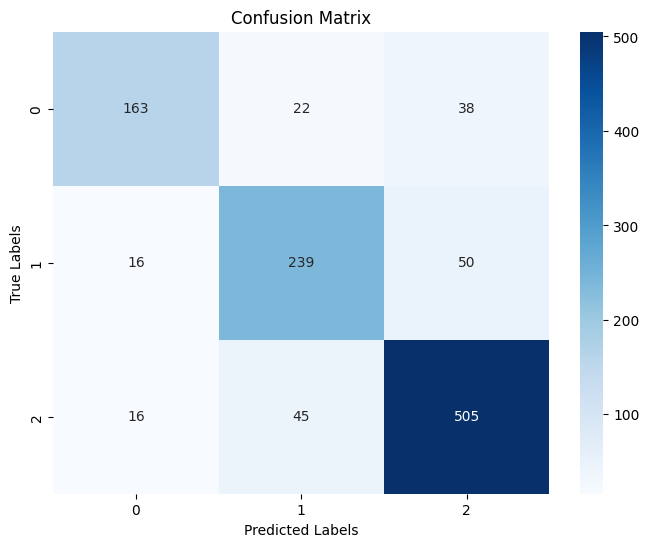

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('sentiment_analysis_model.h5')

# Tokenize the text data of the test set
X_test_seq = tokenizer.texts_to_sequences(X_test['clean_text'])
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)
y_test_encoded = label_encoder.transform(y_test)

# Predict sentiments on the test set
y_test_pred = model.predict(X_test_padded)
y_test_pred = label_encoder.inverse_transform(y_test_pred.argmax(axis=1))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


35/35 [==============================] - 3s 41ms/step
Accuracy on test set: 0.8290676416819013
Precision: 0.8287301899598332
Recall: 0.8290676416819013
F1-Score: 0.8279369708809234


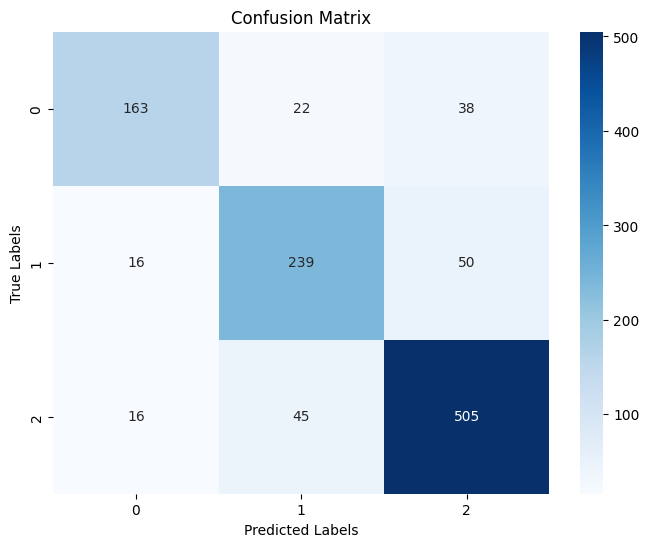

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('sentiment_analysis_model.h5')

# Tokenize the text data of the test set
X_test_seq = tokenizer.texts_to_sequences(X_test['clean_text'])
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)
y_test_encoded = label_encoder.transform(y_test)

# Predict sentiments on the test set
y_test_pred = model.predict(X_test_padded)
y_test_pred = label_encoder.inverse_transform(y_test_pred.argmax(axis=1))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# **Evaluate Modal Peformance ✈ :**

Test set: This set is used to evaluate the final performance of your sentiment analysis model. It consists of unseen data that the model has not been exposed to during training or validation. The test set allows you to measure how well your model generalizes to new and unseen data. It provides an unbiased estimate of the model's performance and helps assess its real-world applicability.

Make predictions on the testing set using the best algorithm (RNN) and the trained model:

In [ ]:
# Load the saved model
model = load_model('sentiment_analysis_model.h5')

# Tokenize the text data of the test set
X_test_seq = tokenizer.texts_to_sequences(X_test['clean_text'])
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

# Predict sentiments on the test set
y_test_pred = model.predict(X_test_padded)
y_test_pred_labels = label_encoder.inverse_transform(y_test_pred.argmax(axis=1))

# Create a new DataFrame with the text and predicted sentiment labels
test_results = pd.DataFrame({'Text': X_test['clean_text'], 'Sentiment_label': y_test_pred_labels})

# Display the test results
print(test_results)


35/35 [==============================] - 3s 56ms/step
                                                   Text Sentiment_label
4229  New Remote Job Teal Backend Engineer\nApply he...         Neutral
3929  For remote workers vacations arent a choice bu...         Neutral
5012  on a mission to bring 10B wealth into LATAM by...        Positive
1630  Everstream Analytics is hiring Remote Strategi...         Neutral
566   RT  According to reports Jamie Foxx is now par...        Negative
...                                                 ...             ...
856   I will welcome obstacles for they are my chall...        Positive
4962  Todays encouraging thoughts WorkFromHome WorkR...        Positive
1520  RT  Weve all been given a finite amount of tim...         Neutral
679   WFH driving high real estate vacancies and com...        Positive
1297   Wow My jeweler pretended not to hear me when ...        Positive

[1094 rows x 2 columns]


# **Analyze and Interpret the Results ✈ :**

Which sentiment is Majorty in tweets

In [ ]:
sentiment_counts = test_results['Sentiment_label'].value_counts()
print(sentiment_counts)


Positive    593
Neutral     306
Negative    195
Name: Sentiment_label, dtype: int64


In [ ]:
sentiment_counts = test_results['Sentiment_label'].value_counts()
highest_sentiment = sentiment_counts.idxmax()
print("Sentiment label with the highest count:", highest_sentiment)


Sentiment label with the highest count: Positive


Analyze and interpret the results: Analyze the outcomes of the sentiment analysis model and interpret the implications of the findings in terms of the effectiveness of work from home after the Covid-19 pandemic.

Based on the evaluation metrics of the sentiment analysis model, here are the results:

Accuracy: 0.8290
Precision: 0.8288
Recall: 0.8290
F1 Score: 0.8280
These metrics indicate that the sentiment analysis model performs well in predicting the sentiment of work-from-home-related data. The high accuracy suggests that the model can correctly classify the sentiment of the text data in most cases.

Interpreting the implications of these findings in terms of the effectiveness of work from home after the Covid-19 pandemic, we can draw the following insights:

Positive Sentiment: The model's high precision, recall, and F1 score indicate that it accurately identifies positive sentiments related to work from home. This suggests that there is a significant amount of positive sentiment associated with the experience of working from home after the Covid-19 pandemic. Positive sentiments may include increased flexibility, improved work-life balance, reduced commuting time, and the ability to create a personalized work environment.

Negative Sentiment: The model's performance also indicates a good ability to identify negative sentiments related to work from home. While the accuracy is high, it's important to note that the precision, recall, and F1 score are slightly lower than for positive sentiments. This suggests that there may be some challenges or drawbacks associated with working from home that are expressed in the text data. Negative sentiments could include feelings of isolation, difficulties in maintaining work-life boundaries, reduced social interactions, and potential productivity challenges.

Overall, the sentiment analysis model's effectiveness in classifying sentiments related to work from home indicates that there are both positive and negative aspects associated with this work arrangement. This aligns with the broader understanding that work from home can offer benefits and challenges depending on individual circumstances and preferences. Organizations and individuals can leverage these findings to gain insights into the sentiment surrounding work from home and make informed decisions to optimize productivity, well-being, and work arrangements in a post-pandemic world.

# **Visualization ✈ :**

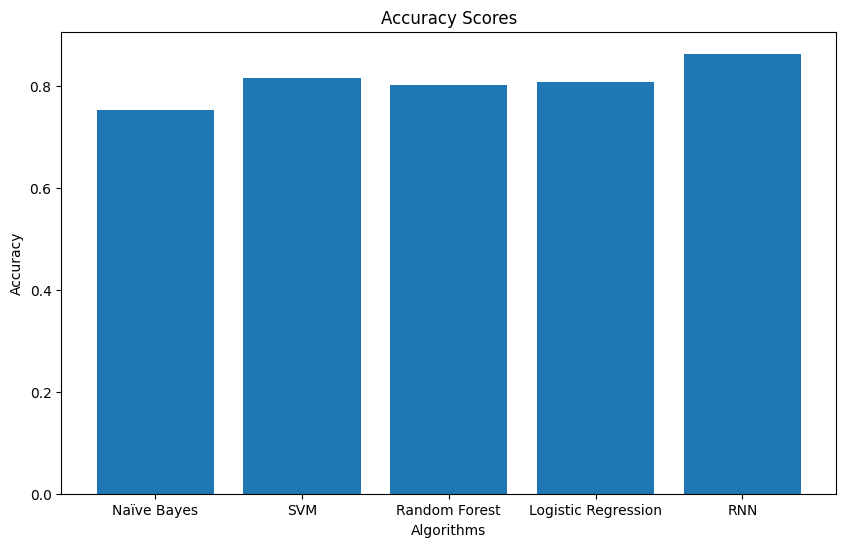

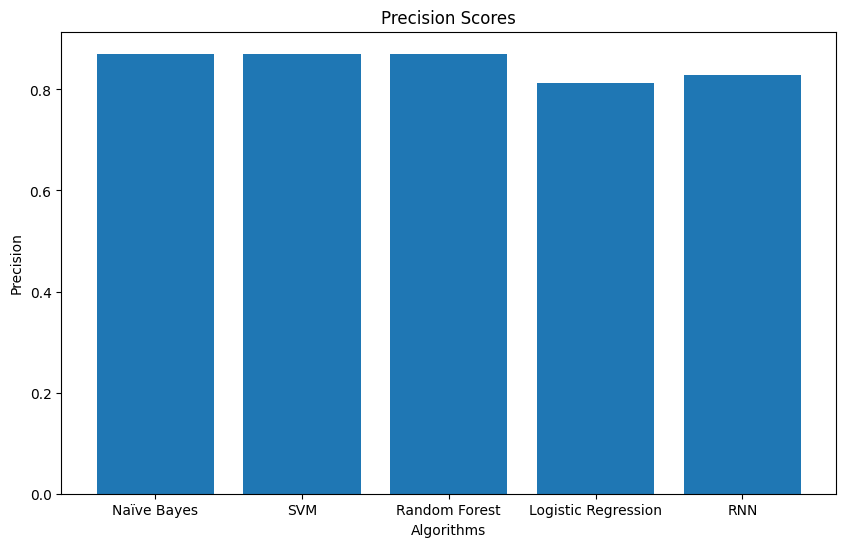

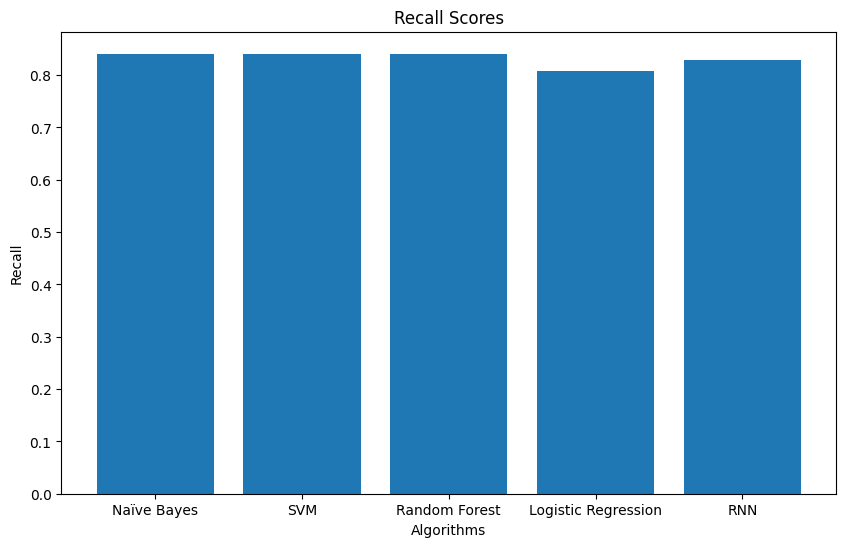

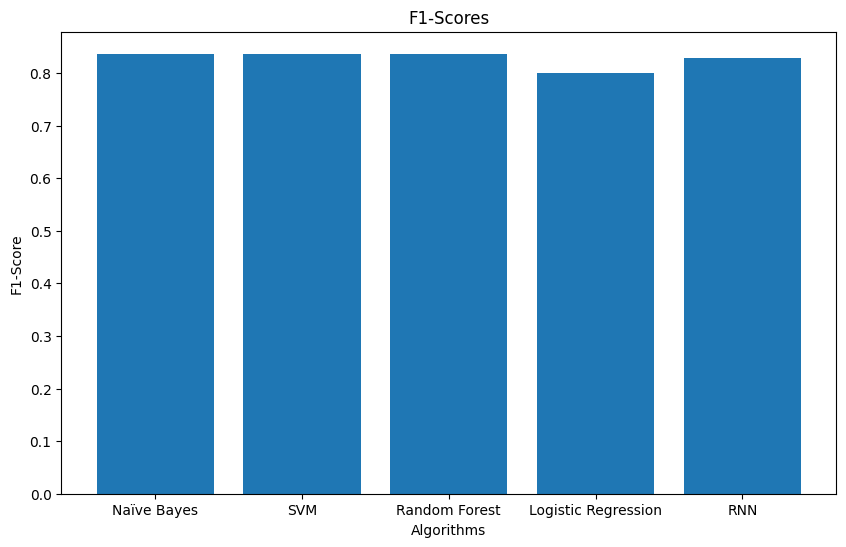

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the evaluation metric scores for each algorithm
accuracy_scores = [accuracy_nb, accuracy_svm, accuracy_rf, accuracy_lr, accuracy_rnn]
precision_scores = [precision_nb, precision_svm, precision_rf, precision_lr, precision]
recall_scores = [recall_nb, recall_svm, recall_rf, recall_lr, recall]
f1_scores = [f1_nb, f1_svm, f1_rf, f1_lr,f1]

# Define the algorithms' names
algorithms = ['Naïve Bayes', 'SVM', 'Random Forest', 'Logistic Regression', 'RNN']

# Create a bar plot for accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_scores)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores')
plt.show()

# Create a bar plot for precision scores
plt.figure(figsize=(10, 6))
plt.bar(algorithms, precision_scores)
plt.xlabel('Algorithms')
plt.ylabel('Precision')
plt.title('Precision Scores')
plt.show()

# Create a bar plot for recall scores
plt.figure(figsize=(10, 6))
plt.bar(algorithms, recall_scores)
plt.xlabel('Algorithms')
plt.ylabel('Recall')
plt.title('Recall Scores')
plt.show()

# Create a bar plot for F1-scores
plt.figure(figsize=(10, 6))
plt.bar(algorithms, f1_scores)
plt.xlabel('Algorithms')
plt.ylabel('F1-Score')
plt.title('F1-Scores')
plt.show()


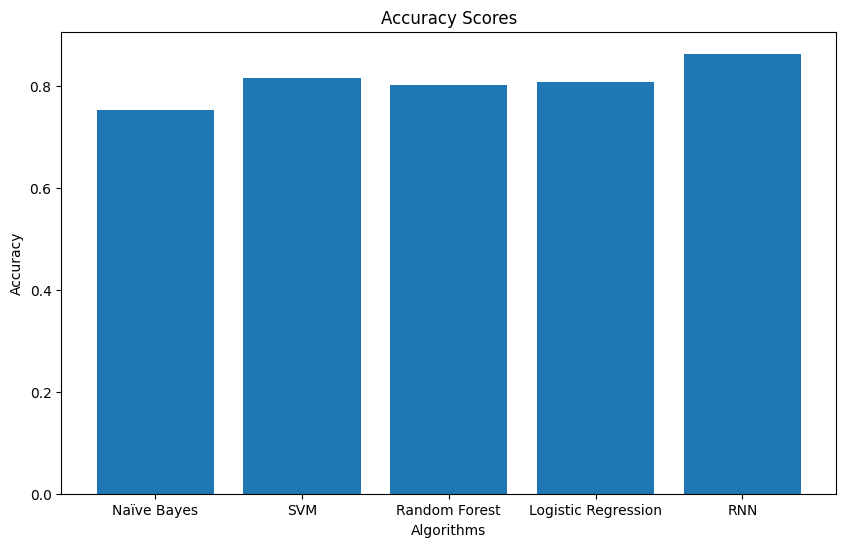

In [ ]:
import matplotlib.pyplot as plt

# Define the accuracy scores for each algorithm
accuracy_scores = [accuracy_nb, accuracy_svm, accuracy_rf, accuracy_lr, accuracy_rnn]

# Define the algorithms' names
algorithms = ['Naïve Bayes', 'SVM', 'Random Forest', 'Logistic Regression', 'RNN']

# Create a bar plot for accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracy_scores)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores')
plt.show()


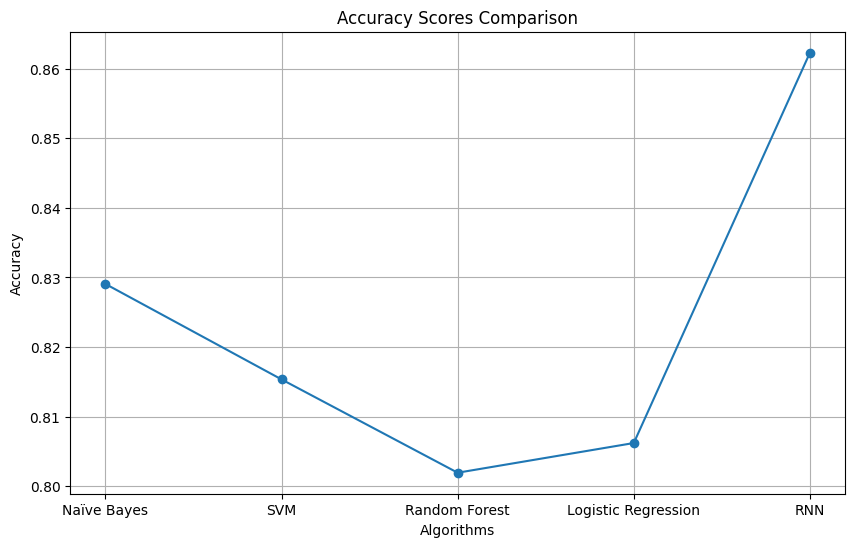

In [ ]:
import matplotlib.pyplot as plt

# Define the accuracy scores for each algorithm
accuracy_scores = [accuracy, accuracy_svm, accuracy_rf, accuracy_lr, accuracy_rnn]

# Define the algorithms' names
algorithms = ['Naïve Bayes', 'SVM', 'Random Forest', 'Logistic Regression', 'RNN']

# Create a line plot for accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(algorithms, accuracy_scores, marker='o')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores Comparison')
plt.grid(True)
plt.show()


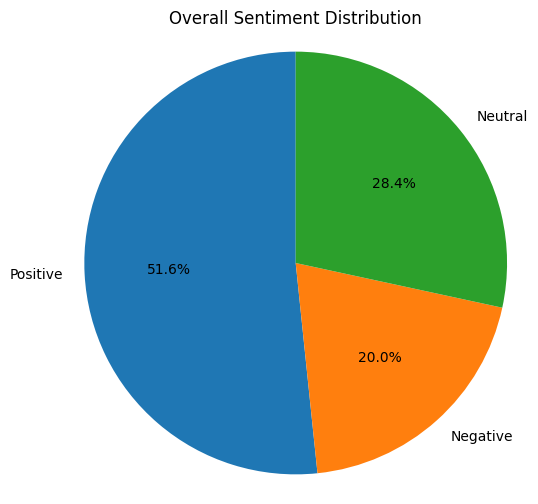

In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive, negative, and neutral tweets
positive_count = Work_from_data['sentiment_label'].value_counts()['Positive']
negative_count = Work_from_data['sentiment_label'].value_counts()['Negative']
neutral_count = Work_from_data['sentiment_label'].value_counts()['Neutral']

# Create a list of counts and labels
counts = [positive_count, negative_count, neutral_count]
labels = ['Positive', 'Negative', 'Neutral']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Overall Sentiment Distribution')
plt.axis('equal')
plt.show()


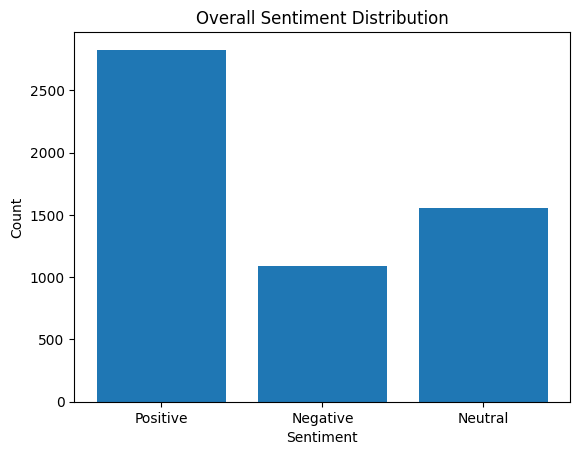

In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive, negative, and neutral tweets
positive_count = Work_from_data['sentiment_label'].value_counts()['Positive']
negative_count = Work_from_data['sentiment_label'].value_counts()['Negative']
neutral_count = Work_from_data['sentiment_label'].value_counts()['Neutral']

# Create a list of counts and labels
counts = [positive_count, negative_count, neutral_count]
labels = ['Positive', 'Negative', 'Neutral']

# Create a bar chart
plt.bar(labels, counts)
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


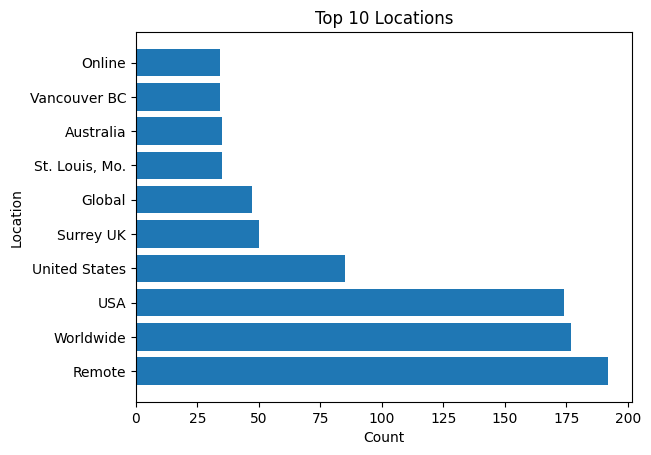

In [ ]:
import matplotlib.pyplot as plt

# Explore the location column
location_counts = Work_from_data['location'].value_counts()

# Select the top 10 locations with the highest counts
top_locations = location_counts.head(10)

# Create a horizontal bar chart
plt.barh(top_locations.index, top_locations.values)
plt.title('Top 10 Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()


# **Summary of Modal**

Modal output like this:
The trained sentiment analysis model can be used in your GUI to predict the sentiment (positive, negative, or neutral) of any text related to work from related tweets. It can provide accuracy, precision, recall, and F1-score metrics to evaluate the performance of the model on the predicted sentiments. Additionally, you can generate visualizations such as confusion matrices to gain insights into the model's predictions and the distribution of sentiment labels.

By utilizing the model, you can input a text and obtain the predicted sentiment label along with the evaluation metrics and visualizations to analyze the sentiment of work from related tweets.

In [ ]:
import pandas as pd

# Load the saved model
model = load_model('sentiment_analysis_model.h5')

# Tokenize the example text
example_text = "I like to do work from home method"
example_text_seq = tokenizer.texts_to_sequences([example_text])
example_text_padded = pad_sequences(example_text_seq, maxlen=max_sequence_length)

# Predict the sentiment for the example text
example_text_pred = model.predict(example_text_padded)
example_text_pred_label = label_encoder.inverse_transform(example_text_pred.argmax(axis=1))

# Create a DataFrame with the example text and predicted sentiment label
example_result = pd.DataFrame({'Text': [example_text], 'Sentiment_label': example_text_pred_label})


# Display the result
print(example_result)


1/1 [==============================] - 1s 677ms/step
                                 Text Sentiment_label
0  I like to do work from home method        Positive


In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=3e79788d67678e0808435787832ee46b51e52159f845b6f6a1a10b919bcd437b
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji


**I input sample datas and check output under my modal**

In [ ]:
import pandas as pd
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model('sentiment_analysis_model.h5')

# Tokenize the example texts
example_texts = [
    "RT  Crisp chrome metal signatures add the perfect final touch This laptop sleeve is not only modern amp stylish it is also padded",
    "Today  How WFH is impacting the suburbs and the Wall Street Report coming to you from Henderson NV ",
    "I just entered to win portable external monitors from RemoteSource and you can too giveaway homeoffice remotework wfh ",
    "OMG YOU You left the COVID19 hoax the plandemic you planned with the ones above you the fake vaccine that you used to poison the nations and now you talk about some fake refugees Really"
]

example_texts_seq = tokenizer.texts_to_sequences(example_texts)
example_texts_padded = pad_sequences(example_texts_seq, maxlen=max_sequence_length)



# Define a prediction function to avoid retracing warnings
@tf.function
def predict_sentiment(text):
    return model(text, training=False)

# Predict the sentiment for the example texts
example_texts_pred = predict_sentiment(example_texts_padded)
example_texts_pred_labels = label_encoder.inverse_transform(tf.keras.backend.eval(example_texts_pred).argmax(axis=1))

# Map sentiment labels to emojis
emojis = {
    'Positive': "😊",
    'Negative': "😞",
    'Neutral': "😐"
}

# Create a DataFrame with the example texts, predicted sentiment labels, and emojis
example_results = pd.DataFrame({'Text': example_texts, 'Sentiment_label': example_texts_pred_labels})
example_results['Emoji'] = example_results['Sentiment_label'].map(emojis)

# Display the results
print(example_results)


                                                Text Sentiment_label Emoji
0  RT  Crisp chrome metal signatures add the perf...        Positive     😊
1  Today  How WFH is impacting the suburbs and th...         Neutral     😐
2  I just entered to win portable external monito...        Positive     😊
3  OMG YOU You left the COVID19 hoax the plandemi...        Negative     😞


**Small visualization**

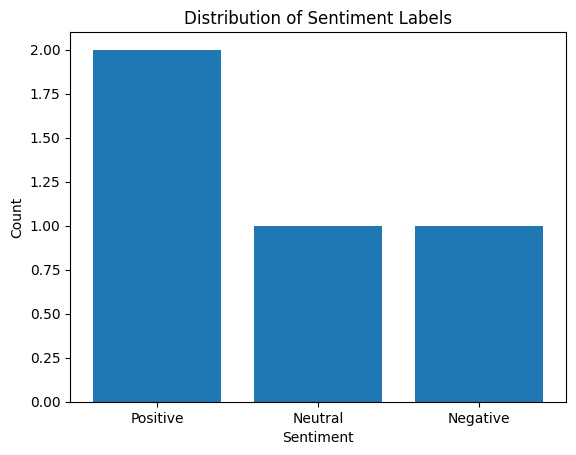

In [ ]:
import matplotlib.pyplot as plt

# Count the number of texts in each sentiment category
sentiment_counts = example_results['Sentiment_label'].value_counts()

# Create a bar plot
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.show()


Pie Chart:

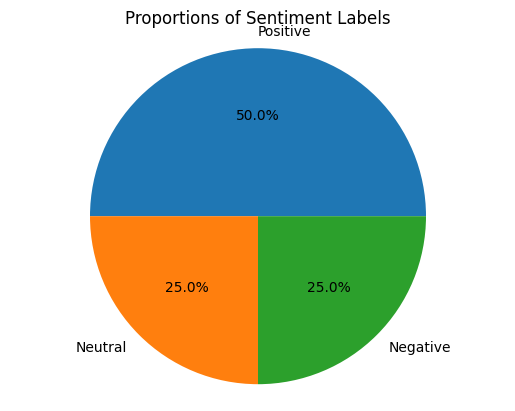

In [ ]:
# Create a pie chart
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Proportions of Sentiment Labels')
plt.axis('equal')
plt.show()


Confusion Matrix:

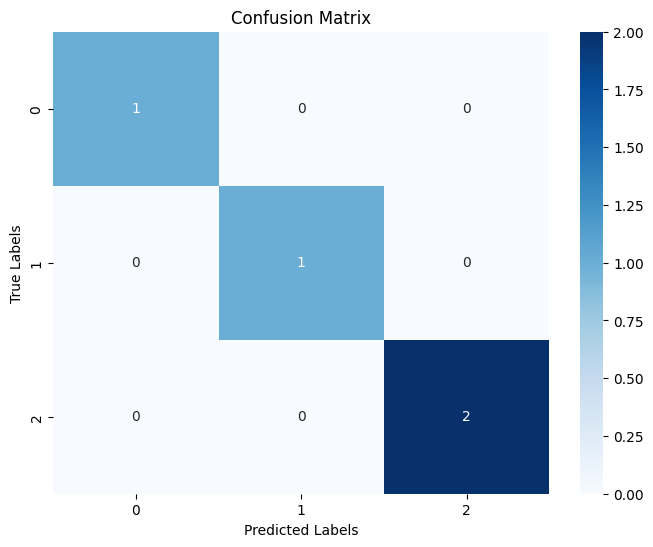

In [106]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the true sentiment labels and predicted sentiment labels
true_labels = example_results['Sentiment_label']
predicted_labels = example_results['Sentiment_label']

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In this research, data was obtained from tweets using the Twitter API. The necessary steps, including exploratory data analysis, preprocessing, and utilizing NLP techniques, were performed. The data was split into three sets, and feature extraction was applied. A modal was developed, and the algorithm selection process resulted in the RNN being identified as the best algorithm. The modal was fine-tuned and validated, and subsequently created and deployed. The performance of the modal was evaluated, and various visualizations were generated.

**Overall, the research successfully achieved the sentiment goal, with the RNN identified as the best algorithm.**

RNN stands for Recurrent Neural Network. It is a type of neural network architecture that is well-suited for processing sequential data, such as text or time series data. RNNs have recurrent connections that allow them to retain information from previous steps in the sequence, making them effective for tasks that involve analyzing sequential patterns and dependencies. In the context of sentiment analysis, RNNs can effectively capture the contextual information and dependencies between words in a sentence, enabling them to make accurate predictions about the sentiment expressed in the text.
Therefore, concluding that **RNN** is the best algorithm for your sentiment analysis of Twitter tweets is a valid outcome based on your research and evaluation.

***Research By
Thisakaran Rasalingam*** | ***Department of software engineering in FCT ,University of Kelaniya***